In [42]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime


from scipy.stats import chi2_contingency
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

### For scaling 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.cluster import DBSCAN

### For normalization
from sklearn.preprocessing import Normalizer

from scipy.stats import pearsonr 
import re

## for visualization

import plotly.express as px
import joypy


# Section 1: Overview
## This jupyter notebook will go as the following: 
### 1. The team has introduced functions that aim to tidying data starting with primary cleansing functions and then EDA for detecting data problem 
### 2. In the Advanced Data Cleansing functions aim for dealing with removing special characters from different columns and then detect whether the inital and the featured engineered columns needes scaling or normailzation and detecting whether there will collinearlity problem or high dependency between ctaregorical varibales 
### 3. After introducting functions in the below, the data srat to be feed into the functions and giving comments why any data processing is used pericesly 


## P.S: The Functions are hyperlinked with their pericse location, by clickinng the function name, one will directed to the function documentation. Additionally, after each there is a hyperlinked button named Return Home, upon clicking, one will be directed to the functions table of content

<a id="fHome"></a>





# Section 2: Functions Table of Content

### Primary Data Cleansing functions

<a id="Rename_columns"></a>

[1. Rename Columns](#fRename_columns)


<a id="Removing_duplciates"></a>

[2. Removing Duplicates ](#fRemoving_duplciates)


<a id="Tidying_columns"></a>

[3. Tidying Columns](#fTidying_columns)




<a id="Initial_missing_check"></a>

[5. Initial Missing Check](#fInitial_missing_check)


<a id="dropping_non_needed_columns"></a>


[6. dropping non needed columns](#fdropping_non_needed_columns)




### Explotary Data Analysis

<a id="plot_missing_heatmap_per_column"></a>

[6. Missing Columns Heatmap](#fplot_missing_heatmap_per_column)





<a id="boxplots"></a>

[7. Boxplot](#fboxplots)


<a id="correlation_plot"></a>

[8. Correlation Plot](#fcorrelation_plot)


<a id="distplot"></a>

[9. Distribution Plot](#fdistplot)


<a id="Word_Frequency_Heatmap"></a>

[10. Word Frequnecy Heatmap](#fWord_Frequency_Heatmap)



### Advanced Data Cleansing Functions



<a id="Removing_numbers_f_text"></a>

[11. Removing numbers from text](#fRemoving_numbers_f_text)


<a id="Special_characters_removed"></a>

[12. Special Character Removed](#fSpecial_characters_removed)



<a id="impute_column"></a>

[13. Impute Column](#fimpute_column)




<a id="Size_characters_removed"></a>

[14. Size Character Removed](#fSize_characters_removed)



<a id="Revenue_Cleansing_Column"></a>

[15. Revenue Cleansing](#fRevenue_Cleansing_Column)



<a id="detect_outliers_dbscan"></a>

[16. Outliers Detection](#fdetect_outliers_dbscan)




### Data Transformation 




<a id="scaling_data"></a>

[17. Scaling Data](#fscaling_data)


<a id="normalizing_data"></a>

[18. Normalizing Data](#fnormalizing_data)


<a id="number_encode_features"></a>

[20. Label Enconding](#fnumber_encode_features)





<a id="Rating_Discretized"></a>

[21. Rating Discretized](#fRating_Discretized)



<a id="Hiring_Position"></a>

[22. Hiring Discretized](#fHiring_Position)



<a id="Correlation"></a>

[23. Numeric Correlation](#fCorrelation)





<a id="Chi_squared"></a>

[24. Chi Squared](#fChi_squared)




### Featured Engineering 


<a id="Extract_tools"></a>

[25. Extracy Tools](#fExtract_tools)


<a id="Extract_company_age"></a>

[26. Company Age](#fExtract_company_age)



<a id="Extract_state"></a>

[27. Extract State ](#fExtract_state)






### Feeding Data Into functions 

<a id="Initial_Cleansing"></a>



[ Inital Cleansing](#fInitial_Cleansing)

<a id="Feeding_Data_Into_Advanced_Cleansing"></a>

[Feed into Adavanced Tech](#fFeeding_Data_Into_Advanced_Cleansing)


<a id="Feeding_Data_Into_Discretization_Feature_Engineering"></a>

[Feed into Data Transformation & Feature Engineering](#fFeeding_Data_Into_Discretization_Feature_Engineering)



### Data Visualiztion 




### Loading Data 


In [43]:
def loading_Data(path): 
    '''
    The function takes the path and then read the data info Data frame and return the data frame
    '''
    df = pd.read_csv(path) 
    
    return df

In [44]:
DS_jobs = loading_Data("Uncleaned_DS_jobs.csv")

<a id="Home"></a>


[Return Home](#fHome)

### Primary  Data Cleansing Functions


<a id="fRename_columns"></a>

In [45]:

def Rename_columns(df): 
    ''' takes data frame 
    check whether the column is seperated by space will be replaced with underscore 
    '''
    ### Applying the replace function through replacing space with the dash 
    
    df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
    
    return df 


<a id="Home"></a>


[Return Home](#fHome)


<a id="fRemoving_duplciates"></a>

In [46]:
def Removing_duplciates(df): 
    
    ''' takes the data frame and then removing duplicates ''' 
    
    ## drop duplciates if any 
    df = df.drop_duplicates() 
    
    return df 

<a id="Home"></a>


[Return Home](#fHome)

<a id="fTidying_columns"></a>

In [47]:
def Tidying_columns(df):
    
    '''
    take the data frame and loops over each column detecting whether the column has -1 or 1 or unknown and replace with nan
    '''
    for column in df.columns:
        if df[column].min() == -1:
            df[column] = df[column].replace(-1, np.NaN)
        elif df[column].min() == "-1" or  df[column].astype(str).str.lower().eq('unknown').any():
                 df[column] = df[column].replace("-1", np.NaN)
                 df[column] = df[column].replace("unknown", np.NaN)
        elif df[column].min() == "-1" or  df[column].astype(str).eq("Unknown / Non-Applicable").any(): 
            df[column] = df[column].replace("-1", np.NaN)
            df[column] = df[column].replace("Unknown / Non-Applicable", np.NaN)
        else:
            pass

    return df


<a id="Home"></a>


[Return Home](#fHome)

<a id="fInitial_missing_check"></a>

In [48]:
def Initial_missing_check(df):
    '''
    Takes df
    Checks nulls as % from the total column 
    '''
    if df.isnull().sum().sum() > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False) 
        total = mask_total[mask_total > 0]

        mask_percent = df.isnull().mean().sort_values(ascending=False) 
        percent = mask_percent[mask_percent > 0] 

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
        print(f'Total and Percentage of NaN:\n {missing_data}')
    else: 
        print('No NaN found.')

<a id="Home"></a>


[Return Home](#fHome)

<a id="fdropping_non_needed_columns"></a>

In [49]:
def dropping_non_needed_columns(df, columns_list): 
    ''' takes data frame and the column list which need to be dropped
    
    '''
    
    new_df = df.drop(columns=columns_list, axis=1, inplace= True)
    
    return new_df 

<a id="Home"></a>


[Return Home](#fHome)

<a id="fSpecial_characters_removed"></a>

### Explotary Data Analysis Functions

<a id="fplot_missing_heatmap_per_column"></a>

In [50]:
def Plot_missing_heatmap_per_column(df):
    """
    Plot a heatmap for missing values in each column with missing values in a DataFrame.

    Parameters:
    - df: pd.DataFrame, the DataFrame to analyze.
    """

    # Identify columns with missing values
    columns_with_missing_values = df.columns[df.isnull().any()]

    # Create subplots for each column with missing values
    fig, axes = plt.subplots(nrows=1, ncols=len(columns_with_missing_values), figsize=(15, 3))

    # Plot a heatmap for each column with missing values
    for i, column in enumerate(columns_with_missing_values):
        sns.heatmap(df[column].isnull().to_frame().T,cmap = "viridis",cbar=False, ax=axes[i])
    

    plt.show()

<a id="Home"></a>


[Return Home](#fHome)

<a id="fboxplots"></a>




In [51]:
def Boxplots(df): 
    
    '''''
    selecting the numeric columns in a data frame and visualize accordingly'''''
    
    ## first dropping index column from the data frame 
    
    #df.drop(index_column_name, axis=1, inplace = True)
    
    ### selecting numeric columns only to be plotted s
    numeric_columns = df.select_dtypes(include=['number'])
    
    ### creating subplots for each column distribution
    
    for i, column in enumerate(numeric_columns):
        column_name = numeric_columns.columns[i]
        sns.boxplot(x=df[column], data=df)
        plt.title(f'Box plot of: {column_name}')
        plt.show()

<a id="Home"></a>



[Return Home](#fHome)

<a id="fcorrelation_plot"></a>


In [52]:
def Correlation_plot(df,column_name_1, column_name_2): 
    
    '''
    Passing data frame and the first numeric data column and the second numeric data column 
    for detecting correlation in term of regplot
    '''
    
    sns.regplot(x=df[column_name_1], y=df[column_name_2], data=df)
    plt.show()



<a id="Home"></a>


[Return Home](#fHome)

<a id="fdistplot"></a>

In [53]:
def Distplot(df): 
    
    '''''
    selecting the numeric columns in a data frame and visualize their dsitribution plots accordingly'''''
    
    ## first dropping index column from the data frame 
    
    #df.drop(index_column_name, axis=1, inplace = True)
    
    ### selecting numeric columns only to be plotted s
    numeric_columns = df.select_dtypes(include=['number'])
    
    ### creating subplots for each column distribution
    
    
    for i, column in enumerate(numeric_columns):
        column_name = numeric_columns.columns[i]
        sns.distplot(df[column])
        plt.title(f'distribution plot of: {column_name}')
        plt.show()

<a id="Home"></a>


[Return Home](#fHome)

<a id="fWord_Frequency_Heatmap"></a>

In [54]:
def Word_Frequency_Heatmap(df, column_list): 
    
    '''''
    selecting the numeric columns in a data frame and visualize their dsitribution plots accordingly'''''
    
    ## first dropping index column from the data frame 
    
    #df.drop(index_column_name, axis=1, inplace = True)
    
    ### selecting numeric columns only to be plotted s
    object_columns = df[column_list]
    
    ### creating subplots for each column distribution
 

    
    for i, column in enumerate(object_columns):
        plt.figure(figsize=(5, 10))
        text_matrix = pd.crosstab(index=object_columns[column], columns='count')
        sns.heatmap(text_matrix, cmap='Blues', annot=True, fmt='g')
        plt.title('Word Frequency Heatmap')
        plt.show()

<a id="Home"></a>


[Return Home](#fHome)

### Advanced Data Cleansing Functions


<a id="fRemoving_numbers_f_text"></a>

In [55]:
def Removing_numbers_f_text(df,column_name):
    
    '''
    The function starts detecting data frame whether the passed column is included or not in the data frame 
    then replac any numbers or spaces
    
    '''

    ### Assess whether the column exist in the dataframe or not 
    
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    # Access the specified column
    selected_column = df[column_name]
    df[column_name] = df[column_name].replace(['\d', '\n.'], '', regex=True)
    return df 
    

<a id="Home"></a>


[Return Home](#fHome)

<a id="fSpecial_characters_removed"></a>

In [56]:
def Special_characters_removed(df,column_name):
    
    '''takes column name and activates
    then split over the column 
    creating new minmum and maximum per column 
    '''
    
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    # Access the specified column
    selected_column = df[column_name]

    # Split the column based on '('
    df[["first_part", "second_part"]] = selected_column.str.split('(', n=1, expand=True)

    # Remove 'k' and '$" 
    df[column_name + "_" + "Adjusted"] = df["first_part"].replace(['K', '\$'], "", regex=True)
    
    ## Splitting the column to have minmum value and maximum value 
    df[[column_name + "_" + "Min", column_name + "_" + "Max"]] = df[column_name + "_" + "Adjusted"].str.split('-', n=1, expand=True)
    
    ### adjusting the type of column minmum and columna maximum into numeric 
    
    df[column_name + "_" + "Min"] = pd.to_numeric(df[column_name + "_" + "Min"], errors='coerce')
    
    df[column_name + "_" + "Max"] = pd.to_numeric(df[column_name + "_" + "Max"], errors='coerce')
    
        
    df[column_name + "_" + "Average"] =  pd.to_numeric(( df[column_name + "_" + "Min"] +  df[column_name + "_" + "Max"]) / 2)

    return df




<a id="Home"></a>


[Return Home](#fHome)


<a id="Home"></a>


[Return Home](#fHome)


<a id="fimpute_column"></a>

In [57]:
def impute_column(df, column_name, method, knn_neighbors=None, features_for_regression=None):
    
    '''
    In the following functon the programmer passes data frame, column name and the valid method each 
    either meadn , median or mode. In case of selecting the K nearest neighbors in case of numeric attribute, the programmer has to input a number 
    In case of choosing the regression method , the programmer has to select the fetaure for regression accordingly
    In case of selecting other methods neither mean, median nor mode, the defualut for Knn neighbors & features for regression are non 
    The selection of Knn number wil be
    '''
    
    ### As a start let the function detect whether the passed column is included in the data frame or not 
        
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")


    
    ### Replacing null values with the mean 
    if method == 'mean':
        df[column_name].fillna(df[column_name].mean(), inplace=True)
        
    ### Repalcing the null values with the median 
    elif method == 'median':
        df[column_name].fillna(df[column_name].median(), inplace=True)
        
    ### Repalcing the null values with the mode in case of the passed column is as type of character 
    elif method == 'mode':
        df[column_name].fillna(df[column_name].mode().iloc[0], inplace=True)
    
    elif method == 'knn':
        knn_imputer = KNNImputer(n_neighbors=knn_neighbors)
        df[column_name] = knn_imputer.fit_transform(df[[column_name]])  # Note: This will return a NumPy array
    elif method == 'regression' and features_for_regression:
        regression_df = df[features_for_regression + [column_name]].dropna()
        X = regression_df[features_for_regression]
        y = regression_df[column_name]
        regression_model = LinearRegression()
        regression_model.fit(X, y)
        df.loc[df[column_name].isna(), column_name] = regression_model.predict(df.loc[df[column_name].isna(), features_for_regression])
    else:
        raise ValueError("Invalid imputation method or missing required parameters.")

    return df

<a id="Home"></a>


[Return Home](#fHome)

<a id="fSize_characters_removed"></a>





In [58]:
def Size_characters_removed(df, column_name): 
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    # Replace 'to' with '-'
    df[column_name + "_Adjusted"] = df[column_name].str.replace('to', '-')
    
    # Replace 'employees' and '+' with an empty string
    df[column_name + "_Adjusted"] = df[column_name + "_Adjusted"].str.replace('employees', '')
    df[column_name + "_Adjusted"] = df[column_name + "_Adjusted"].str.replace('+', '')

    # Split into minimum and maximum
    df[column_name + "_Min"] = df[column_name + "_Adjusted"].apply(lambda x: x.split('-')[0] if '-' in x else x)
    df[column_name + "_Max"] = df[column_name + "_Adjusted"].apply(lambda x: x.split('-')[1] if '-' in x else x)

    # Convert to numeric with error handling
    df[column_name + "_Min"] = pd.to_numeric(df[column_name + "_Min"], errors='coerce')
    df[column_name + "_Max"] = pd.to_numeric(df[column_name + "_Max"], errors='coerce')

      
    df[column_name + "_" + "Average"] = (df[column_name + "_" + "Min"] +  df[column_name + "_" + "Max"]) / 2
          
    df[column_name + "_" + "Average"] = df[column_name + "_" + "Average"].round(decimals = 0)

    return df

<a id="Home"></a>


[Return Home](#fHome)

<a id="fRevenue_Cleansing_Column"></a>




In [59]:
def Revenue_Cleansing_Column(df, column_name): 
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    # Replace 'to' with '-'
    df[column_name + "_Adjusted"] = df[column_name].str.replace('to', '-')
    df[column_name + "_Adjusted"] = df[column_name + "_Adjusted"].str.replace('(', '-')

    # Splitting into two parts
    df["first_part"] = df[column_name + "_Adjusted"].apply(lambda x: x.split('-')[0] if '-' in x else x)
    df["second_part"] = df[column_name + "_Adjusted"].apply(lambda x: x.split('-')[1] if '-' in x else x)
    df["first_part"] = df["first_part"].replace('\$', "", regex=True)
    df["Second_part_Adjusted"] =  df["second_part"].replace(['million', 'billion','\$'], "", regex=True)

    # Convert strings to numeric values
    df["first_part"] = pd.to_numeric(df["first_part"], errors='coerce')
    df["Second_part_Adjusted"] = pd.to_numeric(df["Second_part_Adjusted"], errors='coerce')
    # Handling million and billion
    mask_million = df["second_part"].str.contains("million", case=False)
    mask_billion = df["second_part"].str.contains("billion", case=False)

    df[column_name + "_Min"] = np.where(mask_million, df["first_part"] * 1e6, df["first_part"])
    df[column_name + "_Min"] = np.where(mask_billion, df["first_part"] * 1e9, df["first_part"])
    
    df[column_name + "_Max"] = np.where(mask_million, df["Second_part_Adjusted"] * 1e6, df["Second_part_Adjusted"])
    df[column_name + "_Max"] = np.where(mask_billion, df["Second_part_Adjusted"] * 1e9, df["Second_part_Adjusted"])

    # Calculating average
    df[column_name + "_Average"] = (df[column_name + "_Min"] + df[column_name + "_Max"]) / 2

    # Rounding to the nearest whole number
    df[column_name + "_Average"] = df[column_name + "_Average"].round(decimals=0)

    return df



<a id="Home"></a>


[Return Home](#fHome)

<a id="fdetect_outliers_dbscan"></a>





In [60]:

def detect_outliers_dbscan(df, columns_list, eps, min_samples):
    # Initialize an empty DataFrame to store outliers counts
    outliers_counts = pd.DataFrame(index=df.index)

    for column in columns_list:
        # Select the current column for outlier detection
        data = df[column].values.reshape(-1, 1)

        # Standardize the data in-place
        scaler = StandardScaler()
        df[column] = scaler.fit_transform(data)

        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        # Count outliers in the current column
        outliers_count = pd.Series(labels, index=df.index).value_counts()

        # Store the outliers count in the result DataFrame
        outliers_counts[column + '_outliers'] = outliers_count

    print(outliers_counts)

In [61]:
def replace_outliers_with_median(df, columns_list):
    replaced_df = df.copy()

    for column in columns_list:
        # Calculate the IQR for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)

        # Replace outliers with the median of the column
        replaced_df.loc[outliers_mask, column] = df[column].median()

    return replaced_df


<a id="Home"></a>


[Return Home](#fHome)

### Data Tranformation 

### Scaling Data 


<a id="fscaling_data"></a>



In [62]:
def scaling_data(df, columns_list, method): 
    
    '''
    Passing data frame aligned with the method to normalize numeric columns as each column condition best fits 
    '''
    
    if method == "Min_Max": ## Min max scaling 
        for column in columns_list:
            df[column + "_Scaled"] = MinMaxScaler().fit_transform(df[[column]])
        
    elif method == "Standard": ### standardized scaling
        for column in columns_list:
            df[column + "_Scaled"] = StandardScaler().fit_transform(df[[column]])
    elif method == "Robust": ## robust scaling in case there was outliers that would pull scaling towards them 
        for column in columns_list: 
            df[column + "_Scaled"] = RobustScaler().fit_transform(df[[column]])
        
    elif method == "Max_ABS": ## maximum absolute scaling 
        for column in columns_list: 
            df[column + "_Scaled"] = MaxAbsScaler().fit_transform(df[[column]])
    else:
        raise ValueError("Invalid scaling method or missing required parameters.")


    return df


 <a id="Home"></a>


[Return Home](#fHome)

### Normalizing Data


<a id="fnormalizing_data"></a>

In [63]:
def normalizing_data(df, columns_list, method): 
    
    '''
    Passing data frame aligned with the method to normalize numeric columns as each column condition best fits 
    '''
    
    from sklearn.preprocessing import PowerTransformer
    
    ### If the column doesnot have outliers, normalzition can be used
    if method == "L1":  ### letting the sum of the absolute values of each row equal 1 
        for column in columns_list:
            df[column + "_Normalied"] = Normalizer(norm='l1').fit_transform(df[[column]])
        
    elif method == "L2": ### letting the sum of squared values of each row equal 1
        for column in columns_list:
            df[column + "_Normalized"] = Normalizer(norm='l2').fit_transform(df[[column]])
    elif method == "PowerTransformer": 
        for column in columns_list: ## Letting the data looks more gausains
            df[column + "_Normalized"] = PowerTransformer(method='yeo-johnson').fit_transform(df[[column]])
        
    else:
        raise ValueError("Invalid scaling method or missing required parameters.")


    return df



 <a id="Home"></a>


[Return Home](#fHome)

### Label Encoding 

<a id="number_encode_features"></a>

In [116]:
def number_encode_features(df): 
    '''
    Passing a data frame then copying the inital data 
    '''
    for column in df.columns:
        if df.dtypes[column] == np.object: ## detecting whether the attribute is type of object

            df[column + "_encoded"] = preprocessing.LabelEncoder().fit_transform(df[column]) ## applying label enconding 
    return df

 <a id="Home"></a>


[Return Home](#fHome)

### Discretization

<a id="fRating_Discretized"></a>

In [65]:

def Rating_Discretized(df, column_name):
    '''
    Passing data frame and the column which needs to be discretized 
    '''
    # Convert the column to numeric
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    Column_Group = []  # define array structure
    for rate in df[column_name]:
        if 0 < rate <= 1:
            Column_Group.append("1")
        elif 1 < rate <= 2:
            Column_Group.append("2")
        elif 2 < rate <= 3:
            Column_Group.append("3")
        elif 3 < rate <= 4:
            Column_Group.append("4")
        elif 4 < rate <= 5:
            Column_Group.append("5")
        else:
            Column_Group.append(None)

    # Add the discretized column to the DataFrame
    df[f"{column_name}_Discretized"] = Column_Group
    return df

# Example usage:
# Assuming df is your DataFrame and column_name is the column to discretize
# df = Rating_Discretized(df, "YourColumnName")


 <a id="Home"></a>


[Return Home](#fHome)

<a id="fHiring_Position"></a>



In [66]:
def Hiring_Position(df, column_name): 
    '''
    Takes data frame and the job title name 
    '''
                
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    Column_Group = []
    
    for title in df[column_name]:
        title_lower = title.lower()

        if "data scientist" in title_lower and ("sr" in title_lower or "senior" in title_lower):
            Column_Group.append("Senior Data Scientist")
        elif "data scientist" in title_lower:
            Column_Group.append("Data Scientist")
        elif "data" in title_lower and "science" in title_lower:
            Column_Group.append("Data Scientist")
        elif "data engineer" in title_lower:
            Column_Group.append("Data Engineer")
        elif "data" in title_lower and "engineer" in title_lower:
            Column_Group.append("Data Engineer")
        elif "computer" in title_lower and "scientist" in title_lower:
            Column_Group.append("Data Scientist")
        elif "architect" in title_lower :
            Column_Group.append("Data Arhitect")
        elif "data analyst" in title_lower:
            Column_Group.append("Data Analyst")
        elif "data modeler" in title_lower:
            Column_Group.append("Data Modeler")
        elif "analyst" in title_lower:
            Column_Group.append("Analyst")
        elif "machine learning" in title_lower and ("sr" in title_lower or "senior" in title_lower):
            Column_Group.append("Senior Machine Learning Engineer")
        elif "machine" in title_lower and "learning" in title_lower:
            Column_Group.append("Machine Learning Engineer")
        elif "director" in title_lower:
            Column_Group.append("Director")
        elif "manager" in title_lower:
            Column_Group.append("Manager")
        elif "research" in title_lower:
            Column_Group.append("Resreacher")
        elif "scientist" in title_lower and "senior" in title_lower:
            Column_Group.append("Senior Scientist")
        elif "vice" in title_lower:
            Column_Group.append("Vice President")
        elif "scientist" in title_lower:
            Column_Group.append("Scientist")
        else:
            Column_Group.append(None)
        
    df[column_name + "_Adjusted"] = Column_Group
    
    return df



 <a id="Home"></a>


[Return Home](#fHome)

### Numeric Features Correlation 


<a id="fCorrelation"></a>



In [67]:
def Correlation(df, column_name1, column_name2):

    '''
    take the first column and second column and computes the correlation accordingly

    '''

    # Convert dataframe into series 
    list_column1 = df[column_name1] 
    list_column2 = df[column_name2] 
  
    # Apply the pearsonr() 
    corr, _ = pearsonr(list_column1, list_column2) 
    print('Pearsons correlation: %.3f' % corr) 

    sns.scatterplot( x = df[column_name1],y=df[column_name2])



 <a id="Home"></a>


[Return Home](#fHome)

### Categorical Features Correlation

<a id="fChi_squared"></a>



In [68]:
def Chi_squared(df, column_name1, column_name2):
    '''
    Takes the first column and second column for computing the contignency table 
    '''
    if df[column_name1].dtype != 'object' or df[column_name2].dtype != 'object':
        print(f"Make sure to enter 2 categorical columns.")
    
    contigency= pd.crosstab(df[column_name1], df[column_name2]) 
    _, p, _, _ = chi2_contingency(contigency) 
    # Print the p-value
    print(p) ### f the p test is less than the given p, therefore, there is a high significancy between the 2 columns 
    
    

<a id="Home"></a>


[Return Home](#fHome)

### Feature Engineering 

<a id="fExtract_tools"></a>

In [69]:
def Extract_tools(df, column_name, list_name):
    """
    Extract keywords from the specified column in the DataFrame.

    Parameters:
    - df: DataFrame
    - column_name: str, the column containing job descriptions 
    - list_name: list of str, keywords to extract

    Returns:
    - DataFrame with additional columns for each keyword
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")


    # Convert the specified column to lowercase and remove non-alphanumeric characters
    df[column_name] = df[column_name].astype(str).str.lower().replace('[^\w\s]', '', regex=True)

    # Use list comprehension to create binary columns for each keyword
    for word in list_name:
        df[word] = df[column_name].str.contains(r'\b' + re.escape(word) + r'\b', regex=True).astype(int)

    return df

<a id="Home"></a>


[Return Home](#fHome)

<a id="fExtract_company_age"></a>

In [119]:
def Extract_company_age(df,column_name): 
    '''
    The user passes the data frame to function aligned with the column name 
    
    '''
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")


    ### Compute the current data year
    current_year = datetime.now().year
       # Convert the column to numeric, handling errors with 'coerce'
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    
    # Calculate the company age
    df['Company_Age'] = current_year - df[column_name].replace(-1, current_year)
    
    # Replace negative or invalid values with -1
    df['Company_Age'] = df['Company_Age'].apply(lambda x: -1 if x < 1 else x)
    
    return df

In [71]:
def Extract_state(df, column_name): 
    
    df[column_name] = df[column_name].str.extract('(\D{2})')
    df[column_name]=df[column_name].str.upper()
    df
    
    return df

<a id="Home"></a>


[Return Home](#fHome)

<a id="fExtract_state"></a>

### Questions EDA

In [72]:
def attribute_counting(df, column_name):
    column_count = df[column_name].value_counts()

    fig = px.bar(column_count, 
                 x=column_count.values, 
                 y=column_count.index,
                 color=column_count.index,
                 text=column_count.values,
                 title=f"{column_name} count per category",
                 labels={column_name: "Count"}

                )

    fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
    fig.show()



 <a id="Home"></a>



[Return Home](#fHome)

In [73]:

def salary_plotly(df, column_name_1, column_name_2): 
    fig = px.scatter(df, x=column_name_1, y=column_name_2, color=column_name_1,
                     template='plotly_dark', hover_data=[column_name_1])
    
    fig.show()





 <a id="Home"></a>


[Return Home](#fHome)

In [74]:

def scatter_plotly_plot(df, column_name_1, column_name_2): 
    
    fig = px.scatter(df, x=column_name_1, y=column_name_2, marginal_y="violin",
           marginal_x="box", trendline="ols", template="plotly_dark")
    fig.show()

 <a id="Home"></a>


[Return Home](#fHome)

### Feeding Data Into functions for data processing/ EDA/ Data Transformation and Data Enginnering 

<a id="fInitial_Cleansing"></a>

### Initial cleansing

<a id="Home"></a>


[Return Home](#fHome)

In [75]:
Rename_columns(DS_jobs)
Removing_duplciates(DS_jobs)
Tidying_columns(DS_jobs)



index          Job_Title               Salary_Estimate  \
0        0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1        1     Data Scientist  $137K-$171K (Glassdoor est.)   
2        2     Data Scientist  $137K-$171K (Glassdoor est.)   
3        3     Data Scientist  $137K-$171K (Glassdoor est.)   
4        4     Data Scientist  $137K-$171K (Glassdoor est.)   
..     ...                ...                           ...   
667    667     Data Scientist  $105K-$167K (Glassdoor est.)   
668    668     Data Scientist  $105K-$167K (Glassdoor est.)   
669    669     Data Scientist  $105K-$167K (Glassdoor est.)   
670    670     Data Scientist  $105K-$167K (Glassdoor est.)   
671    671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description  Rating  \
0    Description\n\nThe Senior Data Scientist is re...     3.1   
1    Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2    Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4    Data Scientist\nAffinity Solutions / Marketing...     2.9   
..                                                 ...     ...   
667  Summary\n\nWe’re looking for a data scientist ...     3.6   
668  Job Description\nBecome a thought leader withi...     NaN   
669  Join a thriving company that is changing the w...     NaN   
670  100 Remote Opportunity As an AINLP Data Scient...     5.0   
671  Description\n\nThe Data Scientist will be part...     2.7   

                  Company_Name           Location            Headquarters  \
0             Healthfirst\n3.1       New York, NY            New York, NY   
1                 ManTech\n4.2      Chantilly, VA             Herndon, VA   
2          Analysis Group\n3.8         Boston, MA              Boston, MA   
3                 INFICON\n3.5         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions\n2.9       New York, NY            New York, NY   
..                         ...                ...                     ...   
667              TRANZACT\n3.6       Fort Lee, NJ            Fort Lee, NJ   
668                       JKGT  San Francisco, CA                     NaN   
669                 AccessHope      Irwindale, CA                     NaN   
670  ChaTeck Incorporated\n5.0  San Francisco, CA         Santa Clara, CA   
671         1-800-Flowers\n2.7       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization   
1    5001 to 10000 employees   1968.0         Company - Public   
2     1001 to 5000 employees   1981.0  Private Practice / Firm   
3      501 to 1000 employees   2000.0         Company - Public   
4        51 to 200 employees   1998.0        Company - Private   
..                       ...      ...                      ...   
667   1001 to 5000 employees   1989.0        Company - Private   
668                      NaN      NaN                      NaN   
669                      NaN      NaN                      NaN   
670        1 to 50 employees      NaN        Company - Private   
671   1001 to 5000 employees   1976.0         Company - Public   

                                  Industry             Sector  \
0                       Insurance Carriers          Insurance   
1                   Research & Development  Business Services   
2                               Consulting  Business Services   
3    Electrical & Electronic Manufacturing      Manufacturing   
4                  Advertising & Marketing  Business Services   
..                                     ...                ...   
667                Advertising & Marketing  Business Services   
668                                    NaN                NaN   
669                                    NaN                NaN   
670                Advertising & Marketing  Business Services   
671                   

### From the above inital misisng, it can be noticd that Competitors column has around 75% missing; therefore, it can dropped and index column will be drooped as well since no need for the index column in anaylsis

In [76]:
dropping_non_needed_columns(DS_jobs, ['Competitors','index'])

### Feeding Data Into EDA

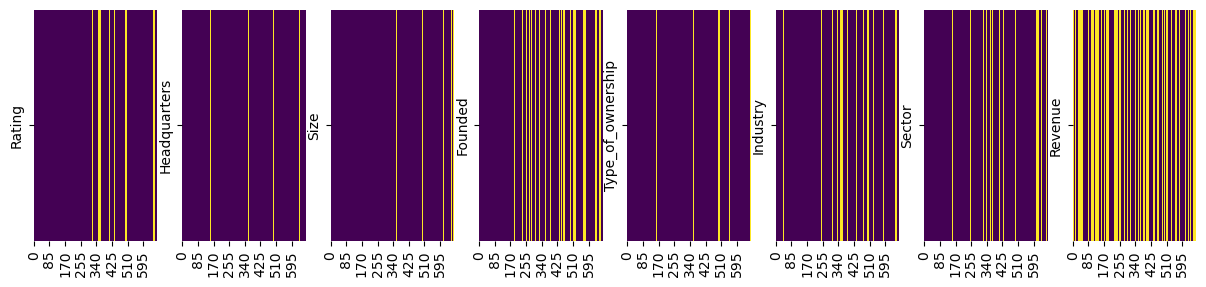

In [77]:
Plot_missing_heatmap_per_column(DS_jobs)

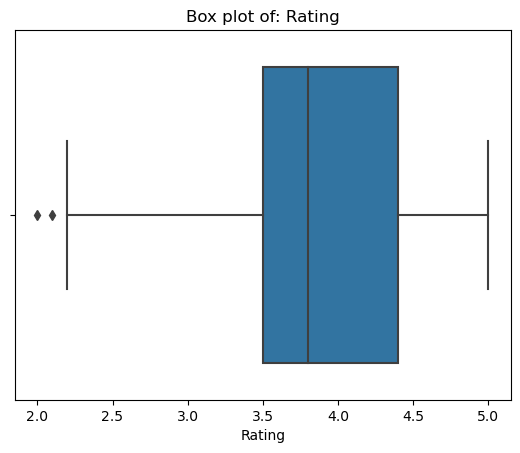

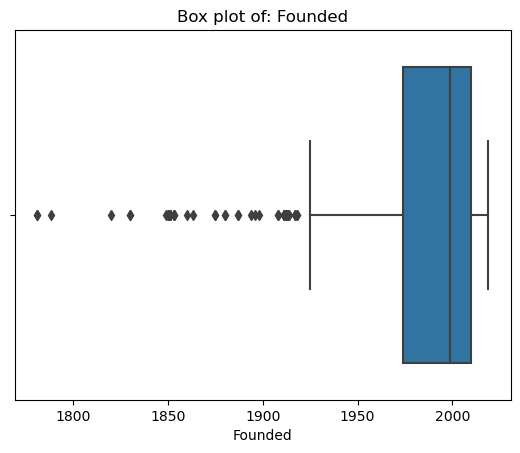

In [78]:
Boxplots(DS_jobs)

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


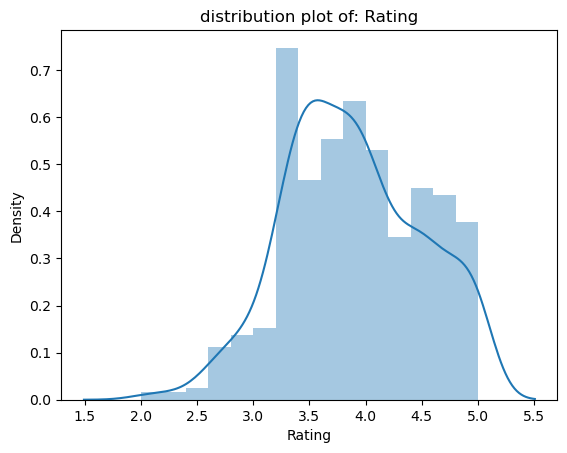

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


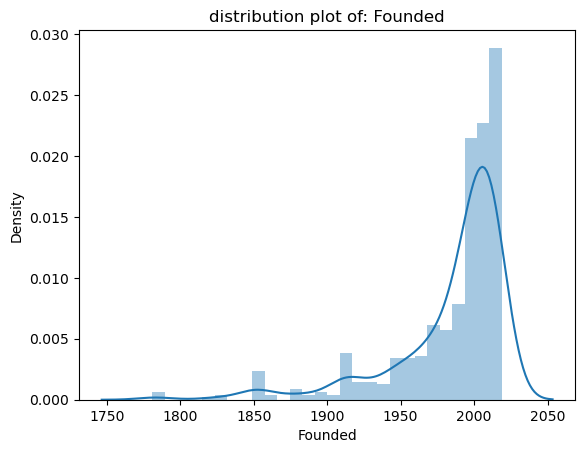

In [79]:
Distplot(DS_jobs)

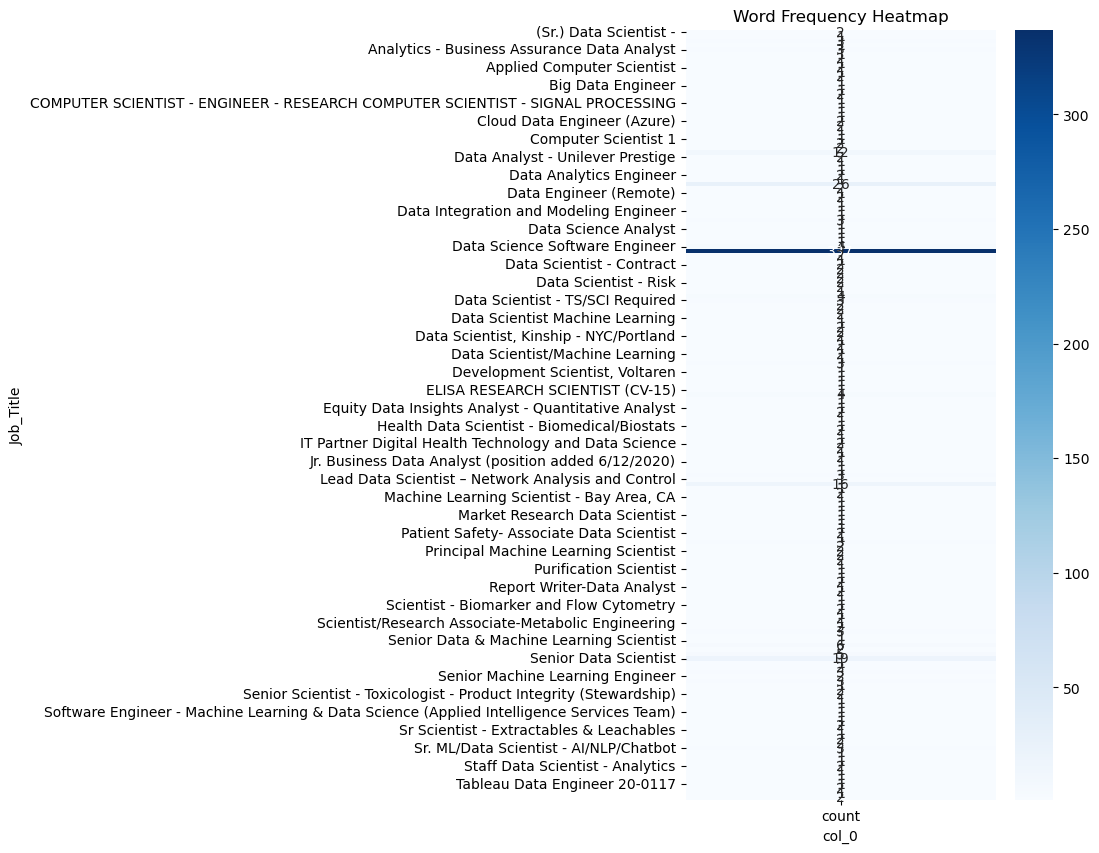

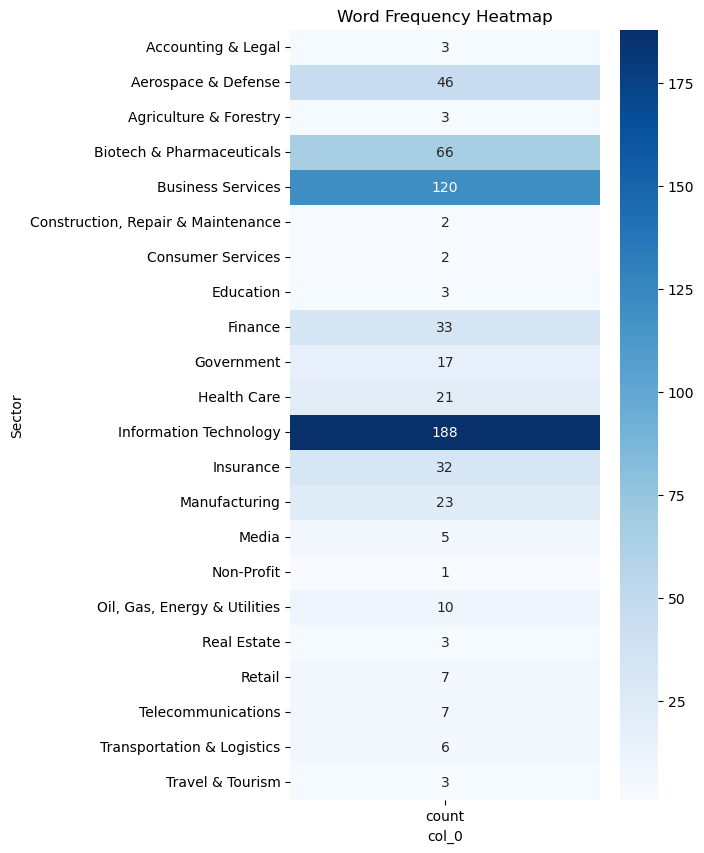

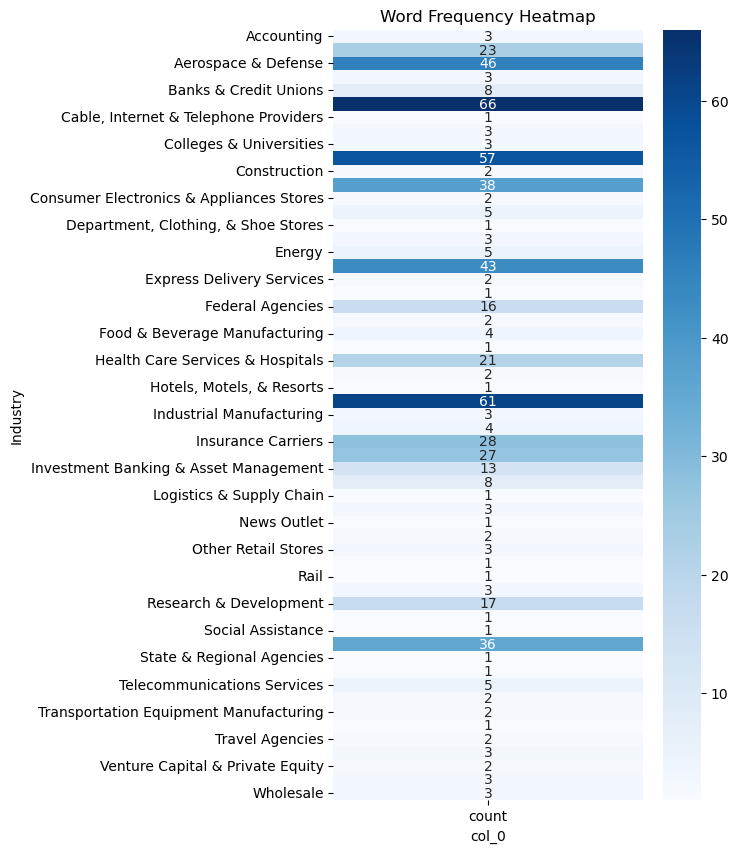

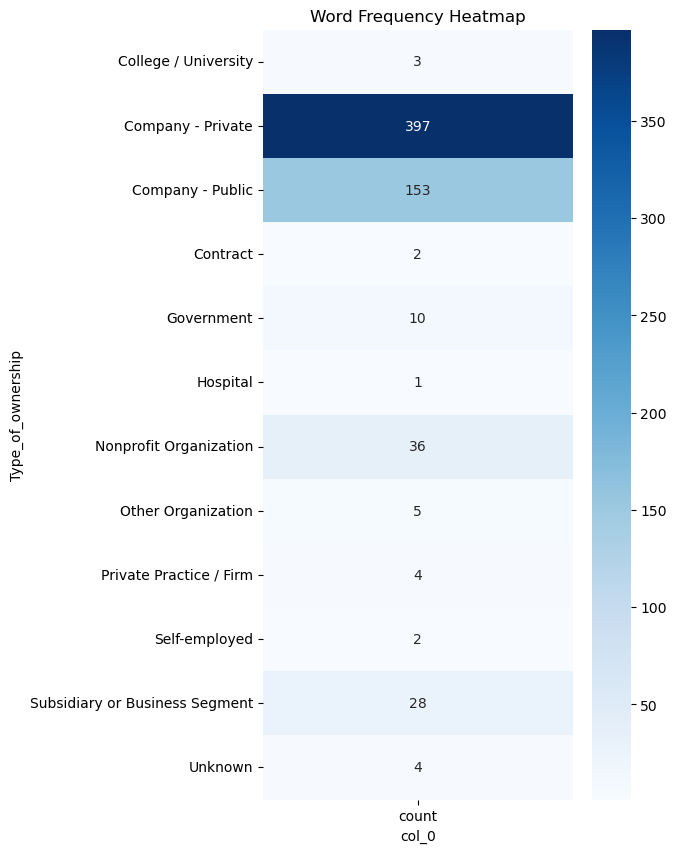

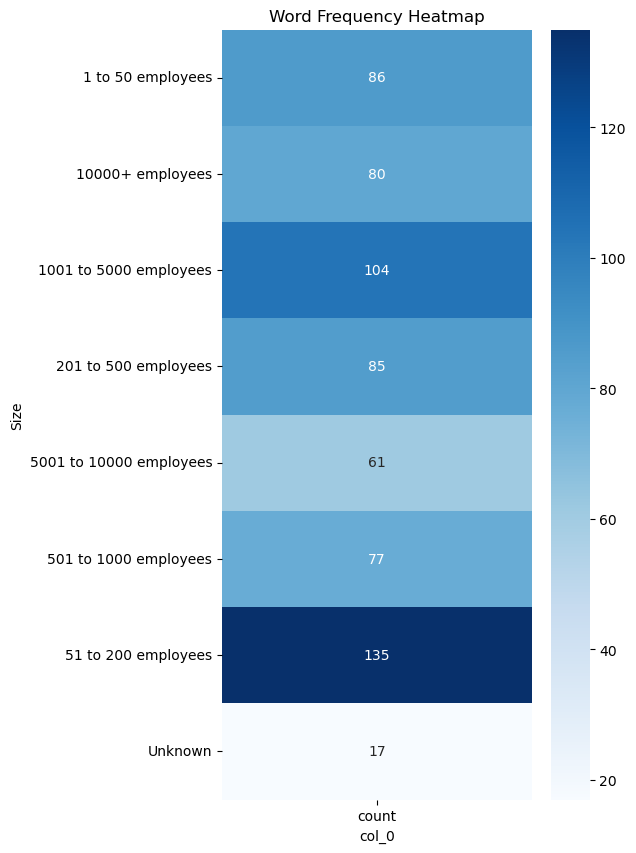

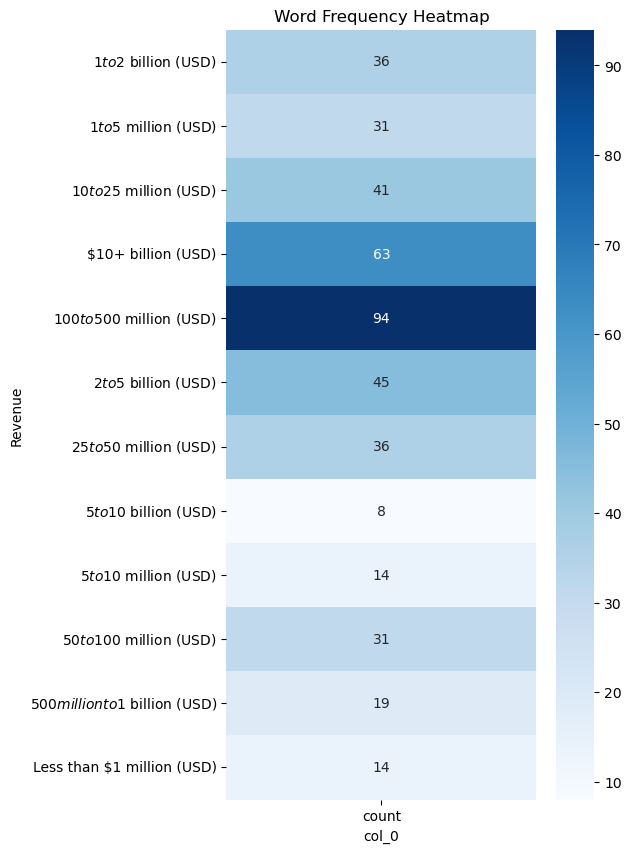

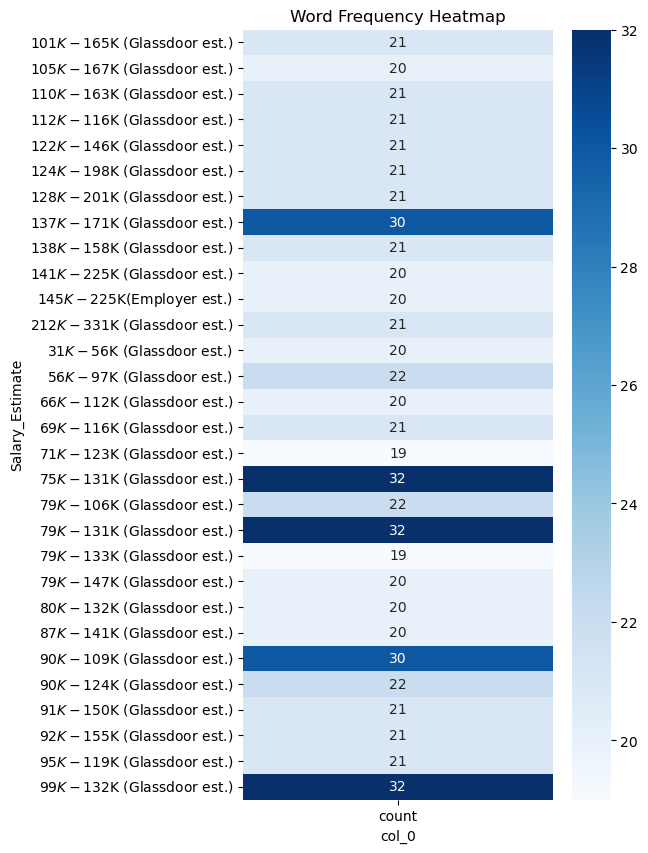

In [80]:
Word_Frequency_Heatmap(DS_jobs,  ['Job_Title','Sector', 'Industry', 'Type_of_ownership', 'Size','Revenue', 'Salary_Estimate'])

## Based on the above visulziations , the follopwing is needed: 

#### 1. Imputing missing values in columns Founded- Industry- Sector - Rating - Headquarters - Revenues - Size - Type of owenership
#### 2. Some numeric variables need to be either transformed or normalized 
#### 3. Columns Salary estiamted , Size and Revenues need to tarnsfered into numeric columns 
#### 4. Feature engineering Salary Estimated, Size
#### 5. Label enconding for columns: Sector, Industry, Type of ownership
#### 6. Detecting outliers and handling in any inital numeric column or the other featured engineered 
#### 7. Detect whether there is a correlation between Size & Salary or between Rating and Salary 
#### 8. Detect whether there is a significant dependecny between Sector and Industry 
#### 9. Discretization for Rating, Job title 





<a id="Home"></a>


[Return Home](#fHome)


<a id="fFeeding_Data_Into_Advanced_Cleansing"></a>

### Feeding Data Into Advanced Cleansing Techniques

### Removing text from company name 

In [81]:
Removing_numbers_f_text(DS_jobs, "Company_Name") ## removing numbers from company name 

Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description  Rating  \
0    Description\n\nThe Senior Data Scientist is re...     3.1   
1    Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2    Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4    Data Scientist\nAffinity Solutions / Marketing...     2.9   
..                                                 ...     ...   
667  Summary\n\nWe’re looking for a data scientist ...     3.6   
668  Job Description\nBecome a thought leader withi...     NaN   
669  Join a thriving company that is changing the w...     NaN   
670  100 Remote Opportunity As an AINLP Data Scient...     5.0   
671  Description\n\nThe Data Scientist will be part...     2.7   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA                     NaN   
669            AccessHope      Irwindale, CA                     NaN   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization   
1    5001 to 10000 employees   1968.0         Company - Public   
2     1001 to 5000 employees   1981.0  Private Practice / Firm   
3      501 to 1000 employees   2000.0         Company - Public   
4        51 to 200 employees   1998.0        Company - Private   
..                       ...      ...                      ...   
667   1001 to 5000 employees   1989.0        Company - Private   
668                      NaN      NaN                      NaN   
669                      NaN      NaN                      NaN   
670        1 to 50 employees      NaN        Company - Private   
671   1001 to 5000 employees   1976.0         Company - Public   

                                  Industry             Sector  \
0                       Insurance Carriers          Insurance   
1                   Research & Development  Business Services   
2                               Consulting  Business Services   
3    Electrical & Electronic Manufacturing      Manufacturing   
4                  Advertising & Marketing  Business Services   
..                                     ...                ...   
667                Advertising & Marketing  Business Services   
668                                    NaN                NaN   
669                                    NaN                NaN   
670                Advertising & Marketing  Business Services   
671                              Wholesale  Business Services   

                        Revenue  
0                           NaN  
1        $1 to $2 billion (USD)  
2    $

### Tidying salary estimate column

In [82]:
Special_characters_removed(DS_jobs, "Salary_Estimate") ## removing words such as (Glassdoor estiamted amd removing the word employee estimate 
## and feature engineering over the minmum and maximum salaries 
impute_column(DS_jobs, "Salary_Estimate_Average", "median") ## replacing the missing values with the mode since the column type is string 
impute_column(DS_jobs, "Salary_Estimate_Min", "median") ## replacing the missing values with the mode since the column type is string 
impute_column(DS_jobs, "Salary_Estimate_Max", "median") ## replacing the missing values with the mode since the column type is string 





Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description  Rating  \
0    Description\n\nThe Senior Data Scientist is re...     3.1   
1    Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2    Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4    Data Scientist\nAffinity Solutions / Marketing...     2.9   
..                                                 ...     ...   
667  Summary\n\nWe’re looking for a data scientist ...     3.6   
668  Job Description\nBecome a thought leader withi...     NaN   
669  Join a thriving company that is changing the w...     NaN   
670  100 Remote Opportunity As an AINLP Data Scient...     5.0   
671  Description\n\nThe Data Scientist will be part...     2.7   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA                     NaN   
669            AccessHope      Irwindale, CA                     NaN   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization   
1    5001 to 10000 employees   1968.0         Company - Public   
2     1001 to 5000 employees   1981.0  Private Practice / Firm   
3      501 to 1000 employees   2000.0         Company - Public   
4        51 to 200 employees   1998.0        Company - Private   
..                       ...      ...                      ...   
667   1001 to 5000 employees   1989.0        Company - Private   
668                      NaN      NaN                      NaN   
669                      NaN      NaN                      NaN   
670        1 to 50 employees      NaN        Company - Private   
671   1001 to 5000 employees   1976.0         Company - Public   

                                  Industry             Sector  \
0                       Insurance Carriers          Insurance   
1                   Research & Development  Business Services   
2                               Consulting  Business Services   
3    Electrical & Electronic Manufacturing      Manufacturing   
4                  Advertising & Marketing  Business Services   
..                                     ...                ...   
667                Advertising & Marketing  Business Services   
668                                    NaN                NaN   
669                                    NaN                NaN   
670                Advertising & Marketing  Business Services   
671                              Wholesale  Business Services   

                        Revenue    first_part      second_part  \
0                           NaN  $137K-$17

### Impupting missing data in Founded with the mode

In [83]:
impute_column(DS_jobs, "Founded", 'mode') 

Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description  Rating  \
0    Description\n\nThe Senior Data Scientist is re...     3.1   
1    Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2    Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4    Data Scientist\nAffinity Solutions / Marketing...     2.9   
..                                                 ...     ...   
667  Summary\n\nWe’re looking for a data scientist ...     3.6   
668  Job Description\nBecome a thought leader withi...     NaN   
669  Join a thriving company that is changing the w...     NaN   
670  100 Remote Opportunity As an AINLP Data Scient...     5.0   
671  Description\n\nThe Data Scientist will be part...     2.7   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA                     NaN   
669            AccessHope      Irwindale, CA                     NaN   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization   
1    5001 to 10000 employees   1968.0         Company - Public   
2     1001 to 5000 employees   1981.0  Private Practice / Firm   
3      501 to 1000 employees   2000.0         Company - Public   
4        51 to 200 employees   1998.0        Company - Private   
..                       ...      ...                      ...   
667   1001 to 5000 employees   1989.0        Company - Private   
668                      NaN   2012.0                      NaN   
669                      NaN   2012.0                      NaN   
670        1 to 50 employees   2012.0        Company - Private   
671   1001 to 5000 employees   1976.0         Company - Public   

                                  Industry             Sector  \
0                       Insurance Carriers          Insurance   
1                   Research & Development  Business Services   
2                               Consulting  Business Services   
3    Electrical & Electronic Manufacturing      Manufacturing   
4                  Advertising & Marketing  Business Services   
..                                     ...                ...   
667                Advertising & Marketing  Business Services   
668                                    NaN                NaN   
669                                    NaN                NaN   
670                Advertising & Marketing  Business Services   
671                              Wholesale  Business Services   

                        Revenue    first_part      second_part  \
0                           NaN  $137K-$17

### Imputing industry with Mode

In [84]:
impute_column(DS_jobs, "Industry", "mode")  ## replacing the missing values with the mode since the column type is string 


Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description  Rating  \
0    Description\n\nThe Senior Data Scientist is re...     3.1   
1    Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2    Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4    Data Scientist\nAffinity Solutions / Marketing...     2.9   
..                                                 ...     ...   
667  Summary\n\nWe’re looking for a data scientist ...     3.6   
668  Job Description\nBecome a thought leader withi...     NaN   
669  Join a thriving company that is changing the w...     NaN   
670  100 Remote Opportunity As an AINLP Data Scient...     5.0   
671  Description\n\nThe Data Scientist will be part...     2.7   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA                     NaN   
669            AccessHope      Irwindale, CA                     NaN   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization   
1    5001 to 10000 employees   1968.0         Company - Public   
2     1001 to 5000 employees   1981.0  Private Practice / Firm   
3      501 to 1000 employees   2000.0         Company - Public   
4        51 to 200 employees   1998.0        Company - Private   
..                       ...      ...                      ...   
667   1001 to 5000 employees   1989.0        Company - Private   
668                      NaN   2012.0                      NaN   
669                      NaN   2012.0                      NaN   
670        1 to 50 employees   2012.0        Company - Private   
671   1001 to 5000 employees   1976.0         Company - Public   

                                  Industry             Sector  \
0                       Insurance Carriers          Insurance   
1                   Research & Development  Business Services   
2                               Consulting  Business Services   
3    Electrical & Electronic Manufacturing      Manufacturing   
4                  Advertising & Marketing  Business Services   
..                                     ...                ...   
667                Advertising & Marketing  Business Services   
668              Biotech & Pharmaceuticals                NaN   
669              Biotech & Pharmaceuticals                NaN   
670                Advertising & Marketing  Business Services   
671                              Wholesale  Business Services   

                        Revenue    first_part      second_part  \
0                           NaN  $137K-$17

### Imputing missing sectors with missing 

In [85]:
impute_column(DS_jobs, "Sector", "mode")  ## replacing the missing values with the mode since the column type is string 

Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description  Rating  \
0    Description\n\nThe Senior Data Scientist is re...     3.1   
1    Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2    Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4    Data Scientist\nAffinity Solutions / Marketing...     2.9   
..                                                 ...     ...   
667  Summary\n\nWe’re looking for a data scientist ...     3.6   
668  Job Description\nBecome a thought leader withi...     NaN   
669  Join a thriving company that is changing the w...     NaN   
670  100 Remote Opportunity As an AINLP Data Scient...     5.0   
671  Description\n\nThe Data Scientist will be part...     2.7   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA                     NaN   
669            AccessHope      Irwindale, CA                     NaN   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization   
1    5001 to 10000 employees   1968.0         Company - Public   
2     1001 to 5000 employees   1981.0  Private Practice / Firm   
3      501 to 1000 employees   2000.0         Company - Public   
4        51 to 200 employees   1998.0        Company - Private   
..                       ...      ...                      ...   
667   1001 to 5000 employees   1989.0        Company - Private   
668                      NaN   2012.0                      NaN   
669                      NaN   2012.0                      NaN   
670        1 to 50 employees   2012.0        Company - Private   
671   1001 to 5000 employees   1976.0         Company - Public   

                                  Industry                  Sector  \
0                       Insurance Carriers               Insurance   
1                   Research & Development       Business Services   
2                               Consulting       Business Services   
3    Electrical & Electronic Manufacturing           Manufacturing   
4                  Advertising & Marketing       Business Services   
..                                     ...                     ...   
667                Advertising & Marketing       Business Services   
668              Biotech & Pharmaceuticals  Information Technology   
669              Biotech & Pharmaceuticals  Information Technology   
670                Advertising & Marketing       Business Services   
671                              Wholesale       Business Services   

                        Revenue    first_part   

### Imputing Rating with Knn

In [86]:
impute_column(DS_jobs,"Rating","knn",5) 

Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    Description\n\nThe Senior Data Scientist is re...  3.100000   
1    Secure our Nation, Ignite your Future\n\nJoin ...  4.200000   
2    Overview\n\n\nAnalysis Group is one of the lar...  3.800000   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...  3.500000   
4    Data Scientist\nAffinity Solutions / Marketing...  2.900000   
..                                                 ...       ...   
667  Summary\n\nWe’re looking for a data scientist ...  3.600000   
668  Job Description\nBecome a thought leader withi...  3.881833   
669  Join a thriving company that is changing the w...  3.881833   
670  100 Remote Opportunity As an AINLP Data Scient...  5.000000   
671  Description\n\nThe Data Scientist will be part...  2.700000   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA                     NaN   
669            AccessHope      Irwindale, CA                     NaN   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization   
1    5001 to 10000 employees   1968.0         Company - Public   
2     1001 to 5000 employees   1981.0  Private Practice / Firm   
3      501 to 1000 employees   2000.0         Company - Public   
4        51 to 200 employees   1998.0        Company - Private   
..                       ...      ...                      ...   
667   1001 to 5000 employees   1989.0        Company - Private   
668                      NaN   2012.0                      NaN   
669                      NaN   2012.0                      NaN   
670        1 to 50 employees   2012.0        Company - Private   
671   1001 to 5000 employees   1976.0         Company - Public   

                                  Industry                  Sector  \
0                       Insurance Carriers               Insurance   
1                   Research & Development       Business Services   
2                               Consulting       Business Services   
3    Electrical & Electronic Manufacturing           Manufacturing   
4                  Advertising & Marketing       Business Services   
..                                     ...                     ...   
667                Advertising & Marketing       Business Services   
668              Biotech & Pharmaceuticals  Information Technology   
669              Biotech & Pharmaceuticals  Information Technology   
670                Advertising & Marketing       Business Services   
671                              Wholesale       Business Services   

                        

In [87]:
impute_column(DS_jobs, "Headquarters", "mode")  ## replacing the missing values with the mode since the column type is string 

Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    Description\n\nThe Senior Data Scientist is re...  3.100000   
1    Secure our Nation, Ignite your Future\n\nJoin ...  4.200000   
2    Overview\n\n\nAnalysis Group is one of the lar...  3.800000   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...  3.500000   
4    Data Scientist\nAffinity Solutions / Marketing...  2.900000   
..                                                 ...       ...   
667  Summary\n\nWe’re looking for a data scientist ...  3.600000   
668  Job Description\nBecome a thought leader withi...  3.881833   
669  Join a thriving company that is changing the w...  3.881833   
670  100 Remote Opportunity As an AINLP Data Scient...  5.000000   
671  Description\n\nThe Data Scientist will be part...  2.700000   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA            New York, NY   
669            AccessHope      Irwindale, CA            New York, NY   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization   
1    5001 to 10000 employees   1968.0         Company - Public   
2     1001 to 5000 employees   1981.0  Private Practice / Firm   
3      501 to 1000 employees   2000.0         Company - Public   
4        51 to 200 employees   1998.0        Company - Private   
..                       ...      ...                      ...   
667   1001 to 5000 employees   1989.0        Company - Private   
668                      NaN   2012.0                      NaN   
669                      NaN   2012.0                      NaN   
670        1 to 50 employees   2012.0        Company - Private   
671   1001 to 5000 employees   1976.0         Company - Public   

                                  Industry                  Sector  \
0                       Insurance Carriers               Insurance   
1                   Research & Development       Business Services   
2                               Consulting       Business Services   
3    Electrical & Electronic Manufacturing           Manufacturing   
4                  Advertising & Marketing       Business Services   
..                                     ...                     ...   
667                Advertising & Marketing       Business Services   
668              Biotech & Pharmaceuticals  Information Technology   
669              Biotech & Pharmaceuticals  Information Technology   
670                Advertising & Marketing       Business Services   
671                              Wholesale       Business Services   

                        

In [88]:
impute_column(DS_jobs,"Size", "mode")  ## replacing the missing values with the mode since the column type is string 


Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    Description\n\nThe Senior Data Scientist is re...  3.100000   
1    Secure our Nation, Ignite your Future\n\nJoin ...  4.200000   
2    Overview\n\n\nAnalysis Group is one of the lar...  3.800000   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...  3.500000   
4    Data Scientist\nAffinity Solutions / Marketing...  2.900000   
..                                                 ...       ...   
667  Summary\n\nWe’re looking for a data scientist ...  3.600000   
668  Job Description\nBecome a thought leader withi...  3.881833   
669  Join a thriving company that is changing the w...  3.881833   
670  100 Remote Opportunity As an AINLP Data Scient...  5.000000   
671  Description\n\nThe Data Scientist will be part...  2.700000   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA            New York, NY   
669            AccessHope      Irwindale, CA            New York, NY   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization   
1    5001 to 10000 employees   1968.0         Company - Public   
2     1001 to 5000 employees   1981.0  Private Practice / Firm   
3      501 to 1000 employees   2000.0         Company - Public   
4        51 to 200 employees   1998.0        Company - Private   
..                       ...      ...                      ...   
667   1001 to 5000 employees   1989.0        Company - Private   
668      51 to 200 employees   2012.0                      NaN   
669      51 to 200 employees   2012.0                      NaN   
670        1 to 50 employees   2012.0        Company - Private   
671   1001 to 5000 employees   1976.0         Company - Public   

                                  Industry                  Sector  \
0                       Insurance Carriers               Insurance   
1                   Research & Development       Business Services   
2                               Consulting       Business Services   
3    Electrical & Electronic Manufacturing           Manufacturing   
4                  Advertising & Marketing       Business Services   
..                                     ...                     ...   
667                Advertising & Marketing       Business Services   
668              Biotech & Pharmaceuticals  Information Technology   
669              Biotech & Pharmaceuticals  Information Technology   
670                Advertising & Marketing       Business Services   
671                              Wholesale       Business Services   

                        

In [89]:
impute_column(DS_jobs, "Revenue", "mode")  ## replacing the missing values with the mode since the column type is string 

Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    Description\n\nThe Senior Data Scientist is re...  3.100000   
1    Secure our Nation, Ignite your Future\n\nJoin ...  4.200000   
2    Overview\n\n\nAnalysis Group is one of the lar...  3.800000   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...  3.500000   
4    Data Scientist\nAffinity Solutions / Marketing...  2.900000   
..                                                 ...       ...   
667  Summary\n\nWe’re looking for a data scientist ...  3.600000   
668  Job Description\nBecome a thought leader withi...  3.881833   
669  Join a thriving company that is changing the w...  3.881833   
670  100 Remote Opportunity As an AINLP Data Scient...  5.000000   
671  Description\n\nThe Data Scientist will be part...  2.700000   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA            New York, NY   
669            AccessHope      Irwindale, CA            New York, NY   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization   
1    5001 to 10000 employees   1968.0         Company - Public   
2     1001 to 5000 employees   1981.0  Private Practice / Firm   
3      501 to 1000 employees   2000.0         Company - Public   
4        51 to 200 employees   1998.0        Company - Private   
..                       ...      ...                      ...   
667   1001 to 5000 employees   1989.0        Company - Private   
668      51 to 200 employees   2012.0                      NaN   
669      51 to 200 employees   2012.0                      NaN   
670        1 to 50 employees   2012.0        Company - Private   
671   1001 to 5000 employees   1976.0         Company - Public   

                                  Industry                  Sector  \
0                       Insurance Carriers               Insurance   
1                   Research & Development       Business Services   
2                               Consulting       Business Services   
3    Electrical & Electronic Manufacturing           Manufacturing   
4                  Advertising & Marketing       Business Services   
..                                     ...                     ...   
667                Advertising & Marketing       Business Services   
668              Biotech & Pharmaceuticals  Information Technology   
669              Biotech & Pharmaceuticals  Information Technology   
670                Advertising & Marketing       Business Services   
671                              Wholesale       Business Services   

                        

In [90]:
impute_column(DS_jobs, "Type_of_ownership", "mode") ## replacing the missing values with the mode since the column type is string 



Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    Description\n\nThe Senior Data Scientist is re...  3.100000   
1    Secure our Nation, Ignite your Future\n\nJoin ...  4.200000   
2    Overview\n\n\nAnalysis Group is one of the lar...  3.800000   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...  3.500000   
4    Data Scientist\nAffinity Solutions / Marketing...  2.900000   
..                                                 ...       ...   
667  Summary\n\nWe’re looking for a data scientist ...  3.600000   
668  Job Description\nBecome a thought leader withi...  3.881833   
669  Join a thriving company that is changing the w...  3.881833   
670  100 Remote Opportunity As an AINLP Data Scient...  5.000000   
671  Description\n\nThe Data Scientist will be part...  2.700000   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA            New York, NY   
669            AccessHope      Irwindale, CA            New York, NY   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization   
1    5001 to 10000 employees   1968.0         Company - Public   
2     1001 to 5000 employees   1981.0  Private Practice / Firm   
3      501 to 1000 employees   2000.0         Company - Public   
4        51 to 200 employees   1998.0        Company - Private   
..                       ...      ...                      ...   
667   1001 to 5000 employees   1989.0        Company - Private   
668      51 to 200 employees   2012.0        Company - Private   
669      51 to 200 employees   2012.0        Company - Private   
670        1 to 50 employees   2012.0        Company - Private   
671   1001 to 5000 employees   1976.0         Company - Public   

                                  Industry                  Sector  \
0                       Insurance Carriers               Insurance   
1                   Research & Development       Business Services   
2                               Consulting       Business Services   
3    Electrical & Electronic Manufacturing           Manufacturing   
4                  Advertising & Marketing       Business Services   
..                                     ...                     ...   
667                Advertising & Marketing       Business Services   
668              Biotech & Pharmaceuticals  Information Technology   
669              Biotech & Pharmaceuticals  Information Technology   
670                Advertising & Marketing       Business Services   
671                              Wholesale       Business Services   

                        

In [91]:
Size_characters_removed(DS_jobs,"Size")

impute_column(DS_jobs, "Size_Min", "median")

impute_column(DS_jobs, "Size_Max", "median")

impute_column(DS_jobs, "Size_Average", "median")


/var/folders/3_/vfw_01rj6274jxpr5h6rnp880000gn/T/ipykernel_2040/2578589835.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column_name + "_Adjusted"] = df[column_name + "_Adjusted"].str.replace('+', '')


Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    Description\n\nThe Senior Data Scientist is re...  3.100000   
1    Secure our Nation, Ignite your Future\n\nJoin ...  4.200000   
2    Overview\n\n\nAnalysis Group is one of the lar...  3.800000   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...  3.500000   
4    Data Scientist\nAffinity Solutions / Marketing...  2.900000   
..                                                 ...       ...   
667  Summary\n\nWe’re looking for a data scientist ...  3.600000   
668  Job Description\nBecome a thought leader withi...  3.881833   
669  Join a thriving company that is changing the w...  3.881833   
670  100 Remote Opportunity As an AINLP Data Scient...  5.000000   
671  Description\n\nThe Data Scientist will be part...  2.700000   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA            New York, NY   
669            AccessHope      Irwindale, CA            New York, NY   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  ...  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization  ...   
1    5001 to 10000 employees   1968.0         Company - Public  ...   
2     1001 to 5000 employees   1981.0  Private Practice / Firm  ...   
3      501 to 1000 employees   2000.0         Company - Public  ...   
4        51 to 200 employees   1998.0        Company - Private  ...   
..                       ...      ...                      ...  ...   
667   1001 to 5000 employees   1989.0        Company - Private  ...   
668      51 to 200 employees   2012.0        Company - Private  ...   
669      51 to 200 employees   2012.0        Company - Private  ...   
670        1 to 50 employees   2012.0        Company - Private  ...   
671   1001 to 5000 employees   1976.0         Company - Public  ...   

       first_part      second_part Salary_Estimate_Adjusted  \
0    $137K-$171K   Glassdoor est.)                 137-171    
1    $137K-$171K   Glassdoor est.)                 137-171    
2    $137K-$171K   Glassdoor est.)                 137-171    
3    $137K-$171K   Glassdoor est.)                 137-171    
4    $137K-$171K   Glassdoor est.)                 137-171    
..            ...              ...                      ...   
667  $105K-$167K   Glassdoor est.)                 105-167    
668  $105K-$167K   Glassdoor est.)                 105-167    
669  $105K-$167K   Glassdoor est.)                 105-167    
670  $105K-$167K   Glassdoor est.)                 105-167    
671  $105K-$167K   Glassdoor est.)                 105-167    

    Salary_Estimate_Min Salary_Estimate_Max Sala

In [92]:
Revenue_Cleansing_Column(DS_jobs,"Revenue")


impute_column(DS_jobs, "Revenue_Min", "median") ## replacing the missing values with the mode since the column type is string 
impute_column(DS_jobs, "Revenue_Max", "median")

impute_column(DS_jobs, "Revenue_Average", "median")



/var/folders/3_/vfw_01rj6274jxpr5h6rnp880000gn/T/ipykernel_2040/2321591714.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column_name + "_Adjusted"] = df[column_name + "_Adjusted"].str.replace('(', '-')


Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    Description\n\nThe Senior Data Scientist is re...  3.100000   
1    Secure our Nation, Ignite your Future\n\nJoin ...  4.200000   
2    Overview\n\n\nAnalysis Group is one of the lar...  3.800000   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...  3.500000   
4    Data Scientist\nAffinity Solutions / Marketing...  2.900000   
..                                                 ...       ...   
667  Summary\n\nWe’re looking for a data scientist ...  3.600000   
668  Job Description\nBecome a thought leader withi...  3.881833   
669  Join a thriving company that is changing the w...  3.881833   
670  100 Remote Opportunity As an AINLP Data Scient...  5.000000   
671  Description\n\nThe Data Scientist will be part...  2.700000   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA            New York, NY   
669            AccessHope      Irwindale, CA            New York, NY   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  ...  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization  ...   
1    5001 to 10000 employees   1968.0         Company - Public  ...   
2     1001 to 5000 employees   1981.0  Private Practice / Firm  ...   
3      501 to 1000 employees   2000.0         Company - Public  ...   
4        51 to 200 employees   1998.0        Company - Private  ...   
..                       ...      ...                      ...  ...   
667   1001 to 5000 employees   1989.0        Company - Private  ...   
668      51 to 200 employees   2012.0        Company - Private  ...   
669      51 to 200 employees   2012.0        Company - Private  ...   
670        1 to 50 employees   2012.0        Company - Private  ...   
671   1001 to 5000 employees   1976.0         Company - Public  ...   

    Salary_Estimate_Average  Size_Adjusted Size_Min  Size_Max Size_Average  \
0                     154.0   1001 - 5000    1001.0    5000.0       3000.0   
1                     154.0  5001 - 10000    5001.0   10000.0       7500.0   
2                     154.0   1001 - 5000    1001.0    5000.0       3000.0   
3                     154.0    501 - 1000     501.0    1000.0        750.0   
4                     154.0      51 - 200      51.0     200.0        126.0   
..                      ...            ...      ...       ...          ...   
667                   136.0   1001 - 5000    1001.0    5000.0       3000.0   
668                   136.0      51 - 200      51.0     200.0        126.0   
669                   136.0      51 - 200      51.0     200.0        126.0   
670                   136

<a id="Home"></a>


[Return Home](#fHome)


<a id="fFeeding_Data_Into_Discretization_Feature_Engineering"></a>

### Feeding into Featuer Tarnsformation and Feature Engineering 

### Rating discretization 

In [93]:
Rating_Discretized(DS_jobs, "Rating") ## Feeding the data to discretize Rating column 

Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    Description\n\nThe Senior Data Scientist is re...  3.100000   
1    Secure our Nation, Ignite your Future\n\nJoin ...  4.200000   
2    Overview\n\n\nAnalysis Group is one of the lar...  3.800000   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...  3.500000   
4    Data Scientist\nAffinity Solutions / Marketing...  2.900000   
..                                                 ...       ...   
667  Summary\n\nWe’re looking for a data scientist ...  3.600000   
668  Job Description\nBecome a thought leader withi...  3.881833   
669  Join a thriving company that is changing the w...  3.881833   
670  100 Remote Opportunity As an AINLP Data Scient...  5.000000   
671  Description\n\nThe Data Scientist will be part...  2.700000   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA            New York, NY   
669            AccessHope      Irwindale, CA            New York, NY   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  ...  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization  ...   
1    5001 to 10000 employees   1968.0         Company - Public  ...   
2     1001 to 5000 employees   1981.0  Private Practice / Firm  ...   
3      501 to 1000 employees   2000.0         Company - Public  ...   
4        51 to 200 employees   1998.0        Company - Private  ...   
..                       ...      ...                      ...  ...   
667   1001 to 5000 employees   1989.0        Company - Private  ...   
668      51 to 200 employees   2012.0        Company - Private  ...   
669      51 to 200 employees   2012.0        Company - Private  ...   
670        1 to 50 employees   2012.0        Company - Private  ...   
671   1001 to 5000 employees   1976.0         Company - Public  ...   

     Size_Adjusted Size_Min Size_Max  Size_Average           Revenue_Adjusted  \
0     1001 - 5000    1001.0   5000.0        3000.0  $100 - $500 million -USD)   
1    5001 - 10000    5001.0  10000.0        7500.0      $1 - $2 billion -USD)   
2     1001 - 5000    1001.0   5000.0        3000.0  $100 - $500 million -USD)   
3      501 - 1000     501.0   1000.0         750.0  $100 - $500 million -USD)   
4        51 - 200      51.0    200.0         126.0  $100 - $500 million -USD)   
..             ...      ...      ...           ...                        ...   
667   1001 - 5000    1001.0   5000.0        3000.0  $100 - $500 million -USD)   
668      51 - 200      51.0    200.0         126.0  $100 - $500 million -USD)   
669      51 - 200      51.0    200.0         126.0  $100 - $500 million -USD

### Job title discretization

In [94]:
Hiring_Position(DS_jobs, "Job_Title") ## feeding the daata to discretize Job title column 

Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    Description\n\nThe Senior Data Scientist is re...  3.100000   
1    Secure our Nation, Ignite your Future\n\nJoin ...  4.200000   
2    Overview\n\n\nAnalysis Group is one of the lar...  3.800000   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...  3.500000   
4    Data Scientist\nAffinity Solutions / Marketing...  2.900000   
..                                                 ...       ...   
667  Summary\n\nWe’re looking for a data scientist ...  3.600000   
668  Job Description\nBecome a thought leader withi...  3.881833   
669  Join a thriving company that is changing the w...  3.881833   
670  100 Remote Opportunity As an AINLP Data Scient...  5.000000   
671  Description\n\nThe Data Scientist will be part...  2.700000   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA            New York, NY   
669            AccessHope      Irwindale, CA            New York, NY   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  ... Size_Min  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization  ...   1001.0   
1    5001 to 10000 employees   1968.0         Company - Public  ...   5001.0   
2     1001 to 5000 employees   1981.0  Private Practice / Firm  ...   1001.0   
3      501 to 1000 employees   2000.0         Company - Public  ...    501.0   
4        51 to 200 employees   1998.0        Company - Private  ...     51.0   
..                       ...      ...                      ...  ...      ...   
667   1001 to 5000 employees   1989.0        Company - Private  ...   1001.0   
668      51 to 200 employees   2012.0        Company - Private  ...     51.0   
669      51 to 200 employees   2012.0        Company - Private  ...     51.0   
670        1 to 50 employees   2012.0        Company - Private  ...      1.0   
671   1001 to 5000 employees   1976.0         Company - Public  ...   1001.0   

    Size_Max Size_Average           Revenue_Adjusted Second_part_Adjusted  \
0     5000.0       3000.0  $100 - $500 million -USD)                500.0   
1    10000.0       7500.0      $1 - $2 billion -USD)                  2.0   
2     5000.0       3000.0  $100 - $500 million -USD)                500.0   
3     1000.0        750.0  $100 - $500 million -USD)                500.0   
4      200.0        126.0  $100 - $500 million -USD)                500.0   
..       ...          ...                        ...                  ...   
667   5000.0       3000.0  $100 - $500 million -USD)                500.0   
668    200.0        126.0  $100 - $500 million -USD)                500.0   
669 

### Corrleation between the Average company size and the salary estimate

Pearsons correlation: -0.003


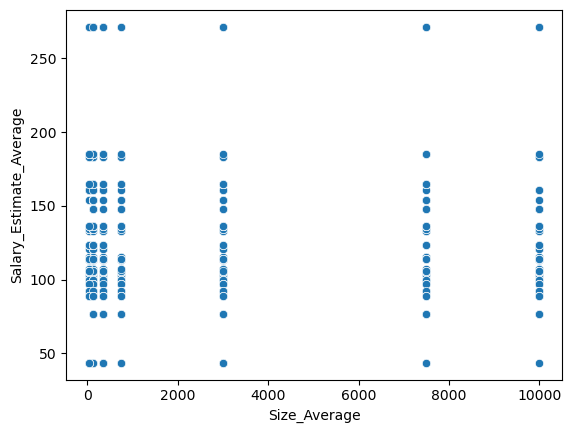

In [95]:
Correlation(DS_jobs, 'Size_Average', 'Salary_Estimate_Average') ## based on the following there is no correlation between the average salary and the company size

### Chi-squared correlaton between the Sector and Industry 

In [96]:
Chi_squared(DS_jobs,'Sector', 'Industry') ## since the P value is less than 0.05, there is a significant relationship between the sector and industry and one of them 
# have to be dropped upon being feed into a model


0.0


### Extracting needed tools per each job title 

In [97]:
Extract_tools(DS_jobs,"Job_Description", ['python', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data']) ## Passing the job description to extarct new one hot enconding 

Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    description\n\nthe senior data scientist is re...  3.100000   
1    secure our nation ignite your future\n\njoin t...  4.200000   
2    overview\n\n\nanalysis group is one of the lar...  3.800000   
3    job description\n\ndo you have a passion for d...  3.500000   
4    data scientist\naffinity solutions  marketing ...  2.900000   
..                                                 ...       ...   
667  summary\n\nwere looking for a data scientist t...  3.600000   
668  job description\nbecome a thought leader withi...  3.881833   
669  join a thriving company that is changing the w...  3.881833   
670  100 remote opportunity as an ainlp data scient...  5.000000   
671  description\n\nthe data scientist will be part...  2.700000   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA            New York, NY   
669            AccessHope      Irwindale, CA            New York, NY   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  ...  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization  ...   
1    5001 to 10000 employees   1968.0         Company - Public  ...   
2     1001 to 5000 employees   1981.0  Private Practice / Firm  ...   
3      501 to 1000 employees   2000.0         Company - Public  ...   
4        51 to 200 employees   1998.0        Company - Private  ...   
..                       ...      ...                      ...  ...   
667   1001 to 5000 employees   1989.0        Company - Private  ...   
668      51 to 200 employees   2012.0        Company - Private  ...   
669      51 to 200 employees   2012.0        Company - Private  ...   
670        1 to 50 employees   2012.0        Company - Private  ...   
671   1001 to 5000 employees   1976.0         Company - Public  ...   

    Revenue_Average Rating_Discretized     Job_Title_Adjusted  python excel  \
0      3.000000e+02                  4  Senior Data Scientist       0     0   
1      1.500000e+09                  5         Data Scientist       0     0   
2      3.000000e+02                  4         Data Scientist       1     0   
3      3.000000e+02                  4         Data Scientist       0     0   
4      3.000000e+02                  3         Data Scientist       1     0   
..              ...                ...                    ...     ...   ...   
667    3.000000e+02                  4         Data Scientist       1     1   
668    3.000000e+02                  4         Data Scientist       0     0   
669    3.000000e+02                  4         Data Scientist       1     0   
670    3.000000

### Extracting Company Age

In [98]:
Extract_company_age(DS_jobs, "Founded")

Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    description\n\nthe senior data scientist is re...  3.100000   
1    secure our nation ignite your future\n\njoin t...  4.200000   
2    overview\n\n\nanalysis group is one of the lar...  3.800000   
3    job description\n\ndo you have a passion for d...  3.500000   
4    data scientist\naffinity solutions  marketing ...  2.900000   
..                                                 ...       ...   
667  summary\n\nwere looking for a data scientist t...  3.600000   
668  job description\nbecome a thought leader withi...  3.881833   
669  join a thriving company that is changing the w...  3.881833   
670  100 remote opportunity as an ainlp data scient...  5.000000   
671  description\n\nthe data scientist will be part...  2.700000   

             Company_Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA            New York, NY   
669            AccessHope      Irwindale, CA            New York, NY   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671             --Flowers       New York, NY         Carle Place, NY   

                        Size  Founded        Type_of_ownership  ...  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization  ...   
1    5001 to 10000 employees   1968.0         Company - Public  ...   
2     1001 to 5000 employees   1981.0  Private Practice / Firm  ...   
3      501 to 1000 employees   2000.0         Company - Public  ...   
4        51 to 200 employees   1998.0        Company - Private  ...   
..                       ...      ...                      ...  ...   
667   1001 to 5000 employees   1989.0        Company - Private  ...   
668      51 to 200 employees   2012.0        Company - Private  ...   
669      51 to 200 employees   2012.0        Company - Private  ...   
670        1 to 50 employees   2012.0        Company - Private  ...   
671   1001 to 5000 employees   1976.0         Company - Public  ...   

    Rating_Discretized     Job_Title_Adjusted python  excel hadoop spark  aws  \
0                    4  Senior Data Scientist      0      0      0     0    1   
1                    5         Data Scientist      0      0      1     0    0   
2                    4         Data Scientist      1      0      0     0    1   
3                    4         Data Scientist      0      0      0     0    0   
4                    3         Data Scientist      1      0      0     0    0   
..                 ...                    ...    ...    ...    ...   ...  ...   
667                  4         Data Scientist      1      1      1     0    0   
668                  4         Data Scientist      0      0      0     0    0   
669                  4         Data Scientist      1      0      1     0    

### Extracting state from the location

In [99]:
Extract_state(DS_jobs, 'Location')

Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    description\n\nthe senior data scientist is re...  3.100000   
1    secure our nation ignite your future\n\njoin t...  4.200000   
2    overview\n\n\nanalysis group is one of the lar...  3.800000   
3    job description\n\ndo you have a passion for d...  3.500000   
4    data scientist\naffinity solutions  marketing ...  2.900000   
..                                                 ...       ...   
667  summary\n\nwere looking for a data scientist t...  3.600000   
668  job description\nbecome a thought leader withi...  3.881833   
669  join a thriving company that is changing the w...  3.881833   
670  100 remote opportunity as an ainlp data scient...  5.000000   
671  description\n\nthe data scientist will be part...  2.700000   

             Company_Name Location            Headquarters  \
0             Healthfirst       NE            New York, NY   
1                 ManTech       CH             Herndon, VA   
2          Analysis Group       BO              Boston, MA   
3                 INFICON       NE  Bad Ragaz, Switzerland   
4      Affinity Solutions       NE            New York, NY   
..                    ...      ...                     ...   
667              TRANZACT       FO            Fort Lee, NJ   
668                  JKGT       SA            New York, NY   
669            AccessHope       IR            New York, NY   
670  ChaTeck Incorporated       SA         Santa Clara, CA   
671             --Flowers       NE         Carle Place, NY   

                        Size  Founded        Type_of_ownership  ...  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization  ...   
1    5001 to 10000 employees   1968.0         Company - Public  ...   
2     1001 to 5000 employees   1981.0  Private Practice / Firm  ...   
3      501 to 1000 employees   2000.0         Company - Public  ...   
4        51 to 200 employees   1998.0        Company - Private  ...   
..                       ...      ...                      ...  ...   
667   1001 to 5000 employees   1989.0        Company - Private  ...   
668      51 to 200 employees   2012.0        Company - Private  ...   
669      51 to 200 employees   2012.0        Company - Private  ...   
670        1 to 50 employees   2012.0        Company - Private  ...   
671   1001 to 5000 employees   1976.0         Company - Public  ...   

    Rating_Discretized     Job_Title_Adjusted python  excel hadoop spark  aws  \
0                    4  Senior Data Scientist      0      0      0     0    1   
1                    5         Data Scientist      0      0      1     0    0   
2                    4         Data Scientist      1      0      0     0    1   
3                    4         Data Scientist      0      0      0     0    0   
4                    3         Data Scientist      1      0      0     0    0   
..                 ...                    ...    ...    ...    ...   ...  ...   
667                  4         Data Scientist      1      1      1     0    0   
668                  4         Data Scientist      0      0      0     0    0   
669                  4         Data Scientist      1      0      1     0    0   
670                  5         Data Scientist      1      0      1     1    0   
671                  3         Dat

### How many job title in the data set ?

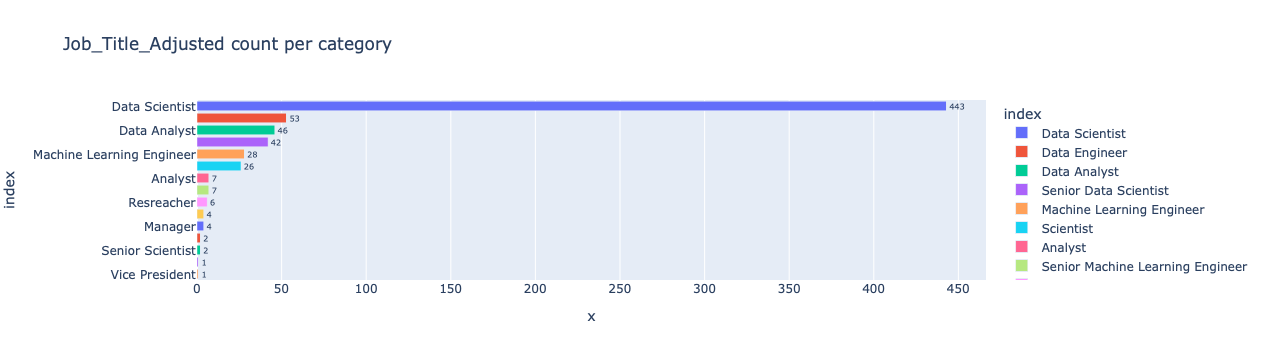

In [100]:
attribute_counting(DS_jobs, "Job_Title_Adjusted")


    

### On Average how the average salary is scattered per each job title ?

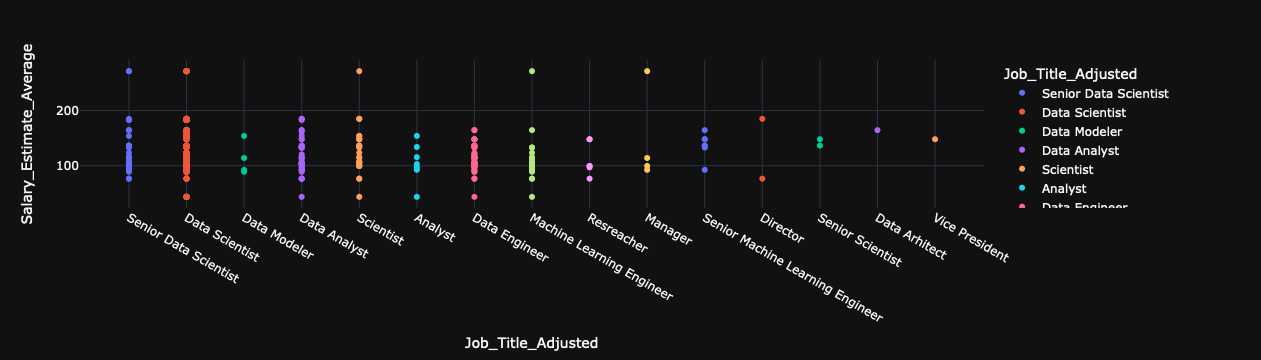

In [101]:
salary_plotly(DS_jobs, "Job_Title_Adjusted", "Salary_Estimate_Average")




### On Avergae in which sector pays higher avearge salary? 

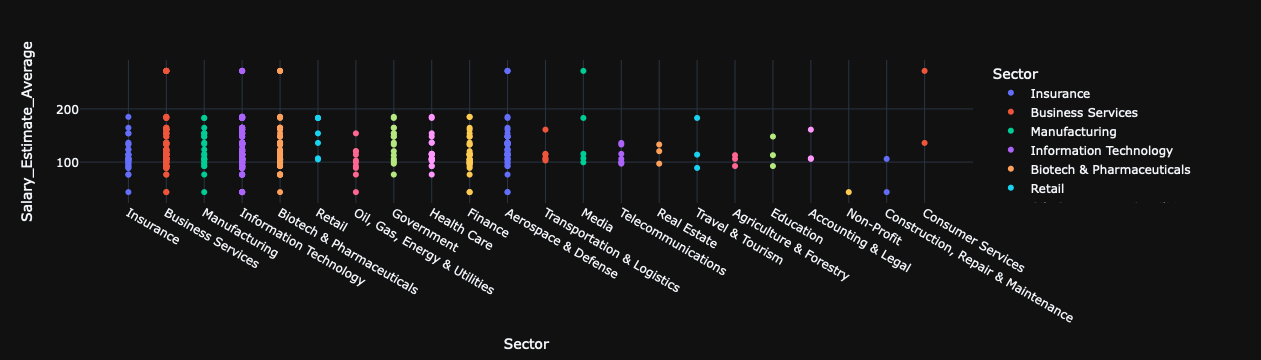

In [102]:
salary_plotly(DS_jobs, "Sector", "Salary_Estimate_Average")

### Is there a correlation between rating and Average salary estiamte

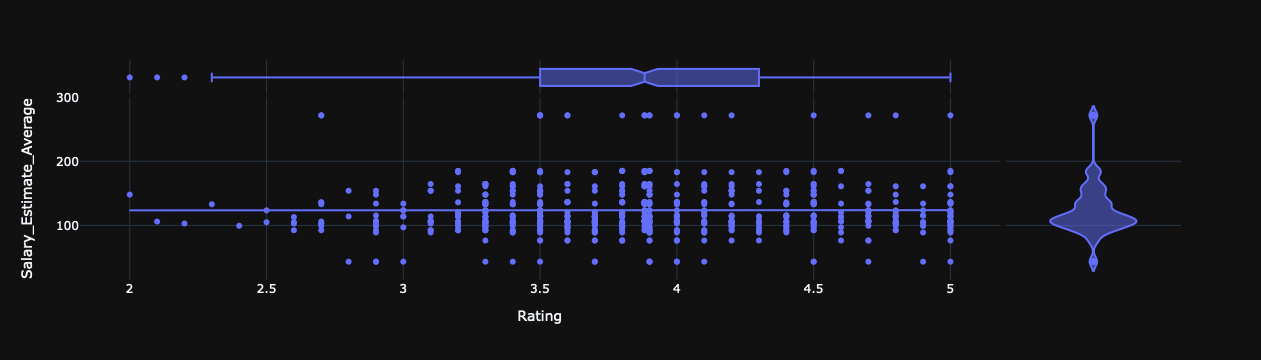

In [103]:
scatter_plotly_plot(DS_jobs, "Rating", "Salary_Estimate_Average")

### Is there a corrleration between the size amd salary estimate average ?


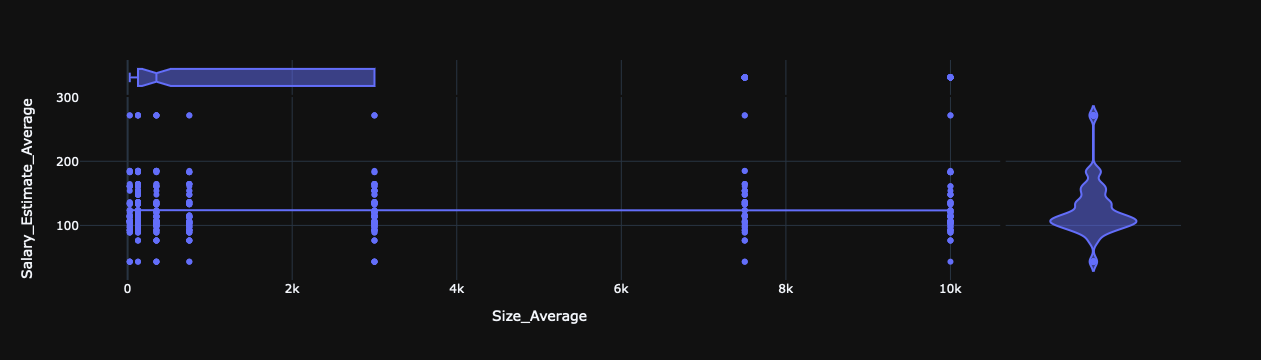

In [104]:
scatter_plotly_plot(DS_jobs, "Size_Average", "Salary_Estimate_Average")


### Data Transformation

### Checking all the misisng values afer data engineering

In [105]:
Initial_missing_check(DS_jobs) ## first part and second adjustes will dropped, no need to be imputed

Total and Percentage of NaN:
                       Total   Percent
first_part               96  0.142857
Second_part_Adjusted     77  0.114583


### Checking outliers and handling them

In [106]:
replace_outliers_with_median(DS_jobs,["Salary_Estimate_Min","Salary_Estimate_Max","Salary_Estimate_Average", 
                                     "Size_Min",
                                     "Size_Max", 
                                     "Size_Average",
                                     "Revenue_Min", 
                                     "Revenue_Max", 
                                     "Revenue_Average"])

Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    description\n\nthe senior data scientist is re...  3.100000   
1    secure our nation ignite your future\n\njoin t...  4.200000   
2    overview\n\n\nanalysis group is one of the lar...  3.800000   
3    job description\n\ndo you have a passion for d...  3.500000   
4    data scientist\naffinity solutions  marketing ...  2.900000   
..                                                 ...       ...   
667  summary\n\nwere looking for a data scientist t...  3.600000   
668  job description\nbecome a thought leader withi...  3.881833   
669  join a thriving company that is changing the w...  3.881833   
670  100 remote opportunity as an ainlp data scient...  5.000000   
671  description\n\nthe data scientist will be part...  2.700000   

             Company_Name Location            Headquarters  \
0             Healthfirst       NE            New York, NY   
1                 ManTech       CH             Herndon, VA   
2          Analysis Group       BO              Boston, MA   
3                 INFICON       NE  Bad Ragaz, Switzerland   
4      Affinity Solutions       NE            New York, NY   
..                    ...      ...                     ...   
667              TRANZACT       FO            Fort Lee, NJ   
668                  JKGT       SA            New York, NY   
669            AccessHope       IR            New York, NY   
670  ChaTeck Incorporated       SA         Santa Clara, CA   
671             --Flowers       NE         Carle Place, NY   

                        Size  Founded        Type_of_ownership  ...  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization  ...   
1    5001 to 10000 employees   1968.0         Company - Public  ...   
2     1001 to 5000 employees   1981.0  Private Practice / Firm  ...   
3      501 to 1000 employees   2000.0         Company - Public  ...   
4        51 to 200 employees   1998.0        Company - Private  ...   
..                       ...      ...                      ...  ...   
667   1001 to 5000 employees   1989.0        Company - Private  ...   
668      51 to 200 employees   2012.0        Company - Private  ...   
669      51 to 200 employees   2012.0        Company - Private  ...   
670        1 to 50 employees   2012.0        Company - Private  ...   
671   1001 to 5000 employees   1976.0         Company - Public  ...   

    Rating_Discretized     Job_Title_Adjusted python  excel hadoop spark  aws  \
0                    4  Senior Data Scientist      0      0      0     0    1   
1                    5         Data Scientist      0      0      1     0    0   
2                    4         Data Scientist      1      0      0     0    1   
3                    4         Data Scientist      0      0      0     0    0   
4                    3         Data Scientist      1      0      0     0    0   
..                 ...                    ...    ...    ...    ...   ...  ...   
667                  4         Data Scientist      1      1      1     0    0   
668                  4         Data Scientist      0      0      0     0    0   
669                  4         Data Scientist      1      0      1     0    0   
670                  5         Data Scientist      1      0      1     1    0   
671                  3         Dat

### Checking wether the column needs to be standarized or min max will be fitted more 

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



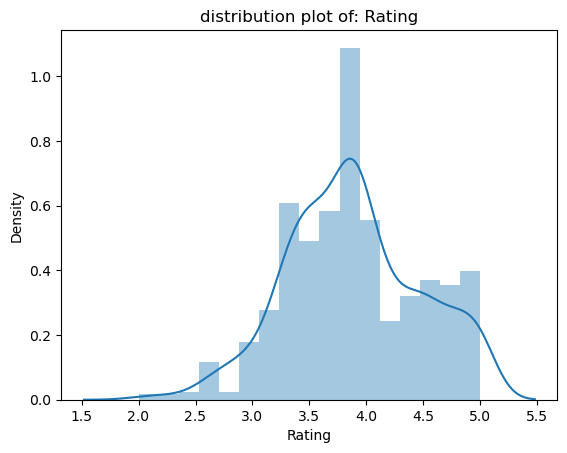

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



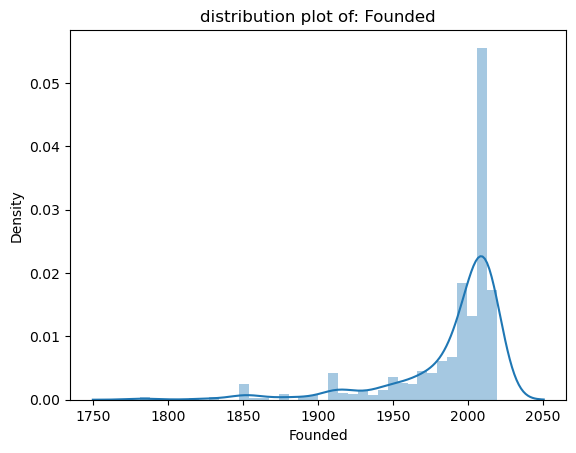

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



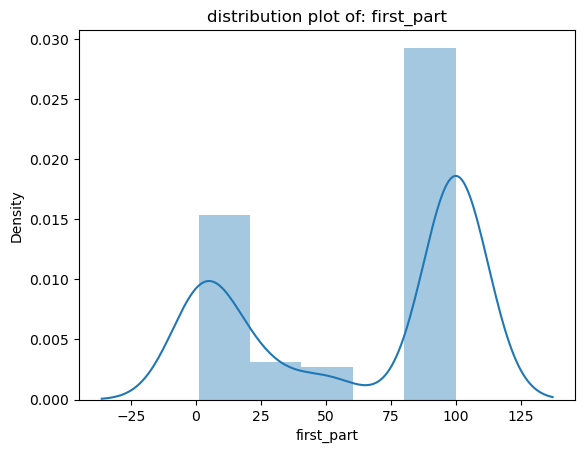

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



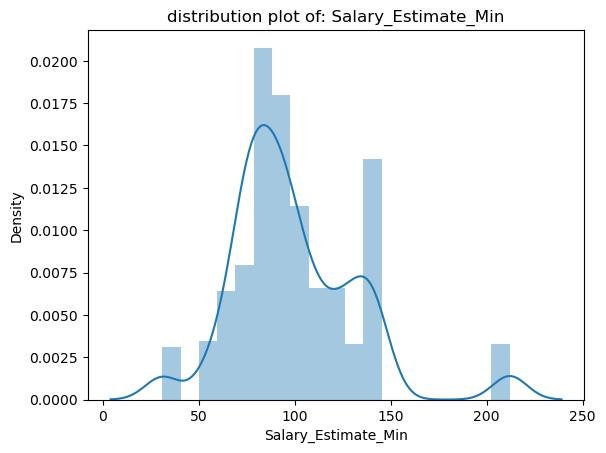

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



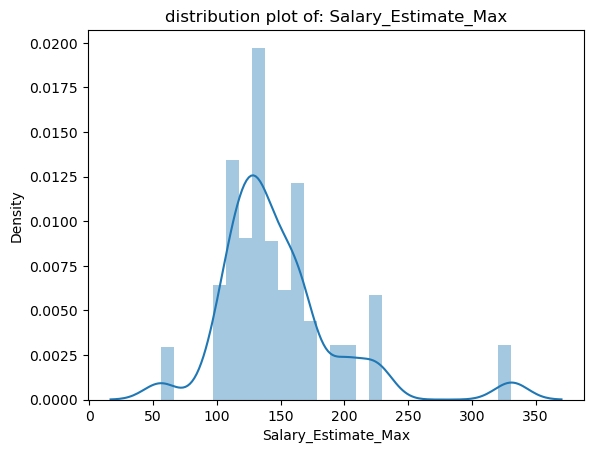

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



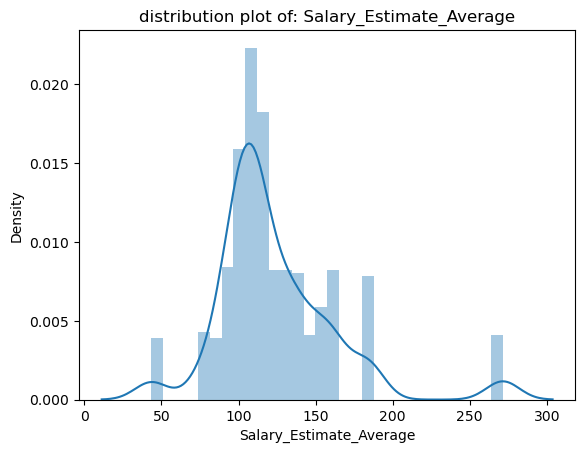

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



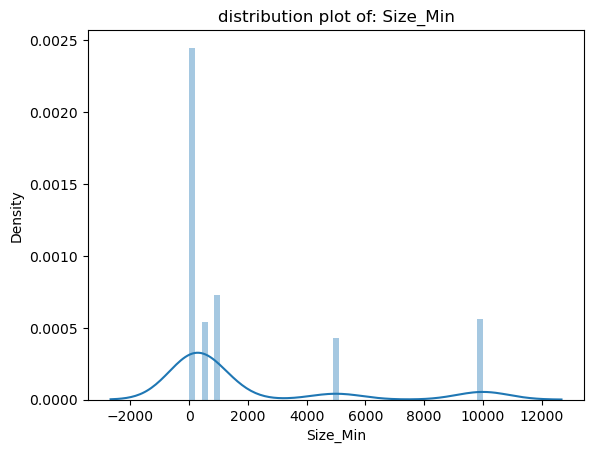

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



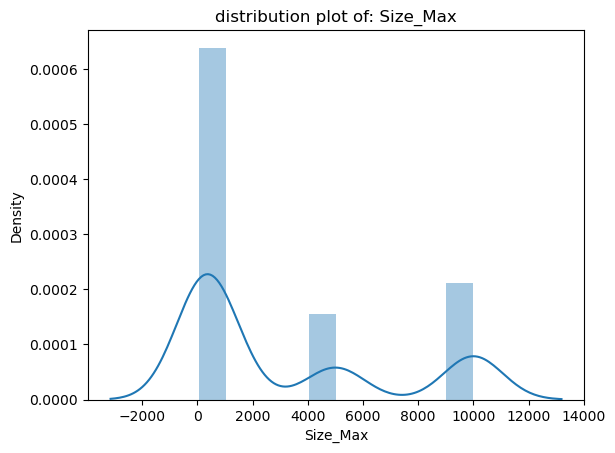

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



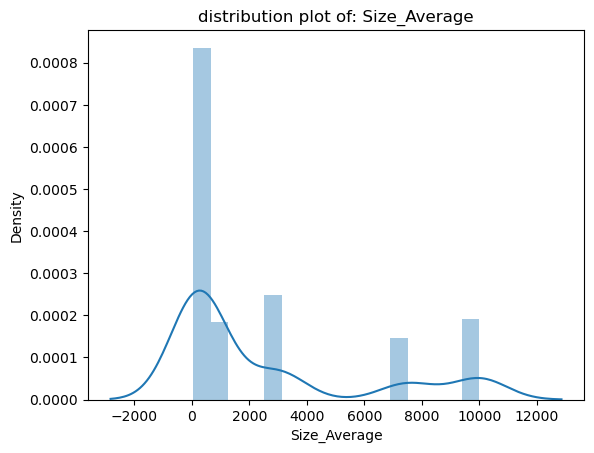

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



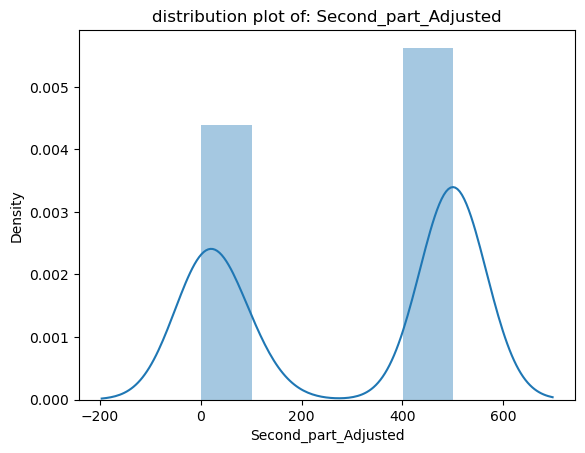

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



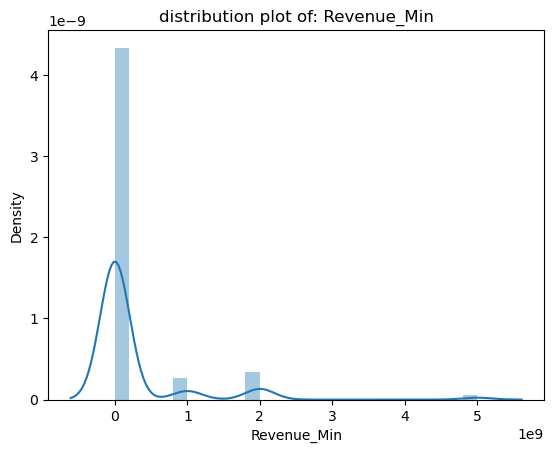

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



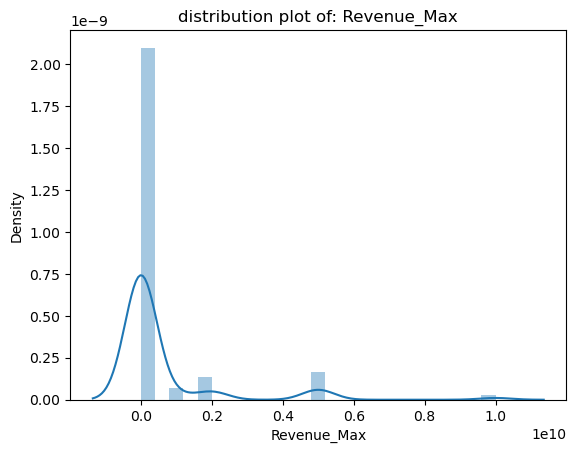

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



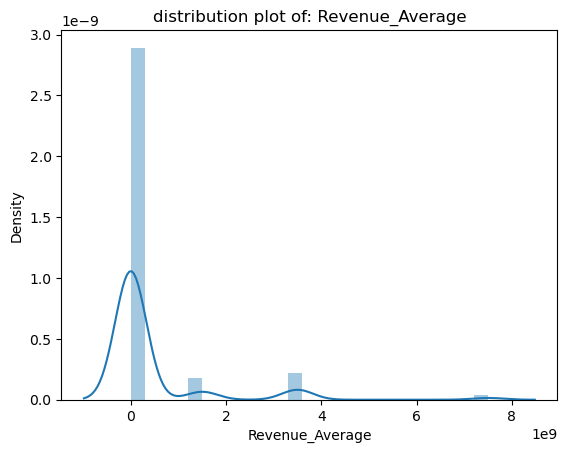

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



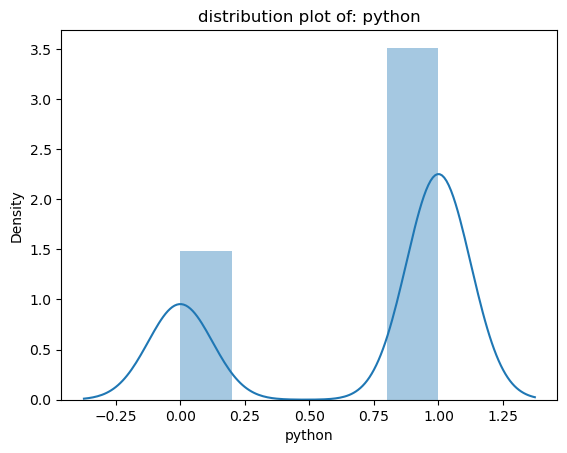

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



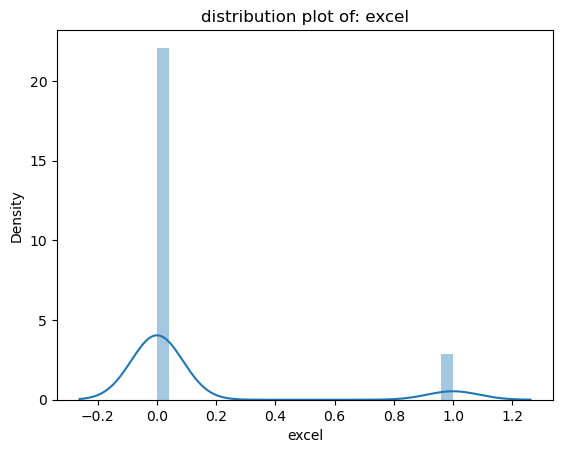

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



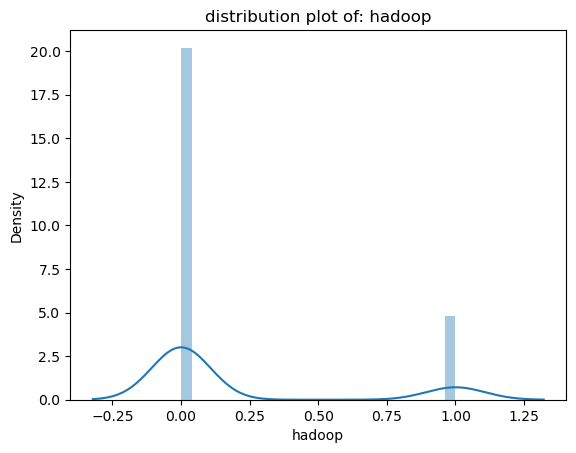

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



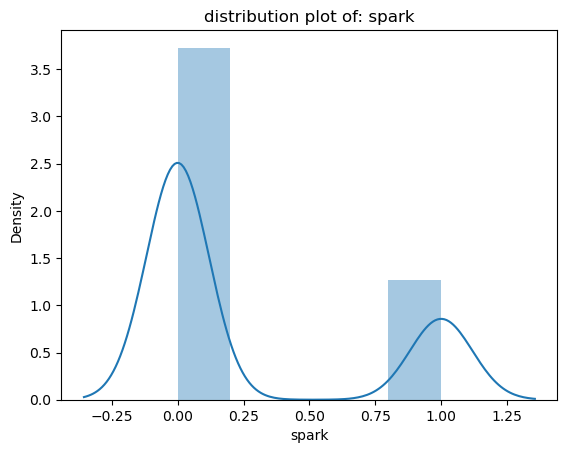

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



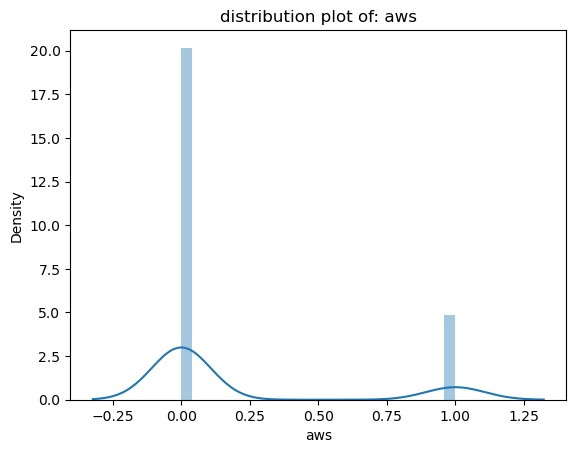

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



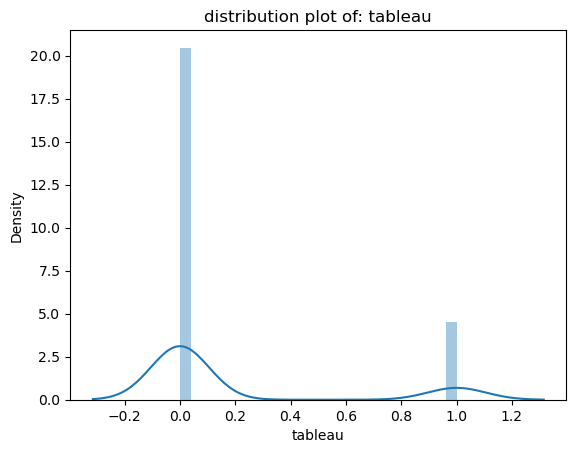

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



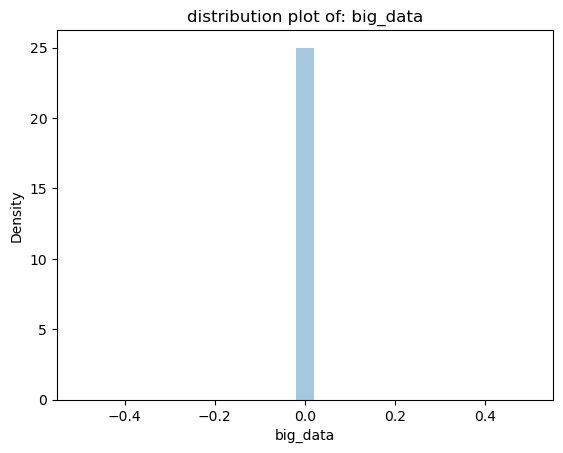

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



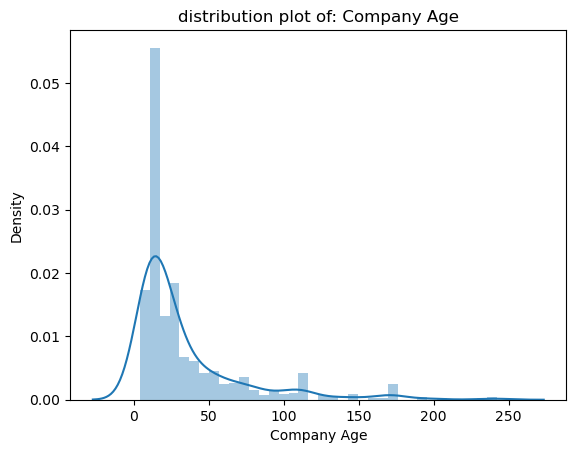

In [107]:
Distplot(DS_jobs) ## Rating is more \\

### Based on the above the columns that are more closing to follow Gauassian distribution will be standardized and the columns that are more
## away from  following Gaussian distribution will be normalized to look more like Gaussian 

### Standarizing : 
#### Rating 
#### Salary Estimate Min
#### Salay Estimnated MAX
### Normalizing: 
#### Founded 
#### Size Min
#### Size Max
#### Revenue Min
#### Revenue Max



In [108]:
scaled_columns_list = ['Rating', 'Salary_Estimate_Min', 'Salary_Estimate_Max']

In [109]:
scaling_data(DS_jobs, scaled_columns_list,"Robust")

Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    description\n\nthe senior data scientist is re...  3.100000   
1    secure our nation ignite your future\n\njoin t...  4.200000   
2    overview\n\n\nanalysis group is one of the lar...  3.800000   
3    job description\n\ndo you have a passion for d...  3.500000   
4    data scientist\naffinity solutions  marketing ...  2.900000   
..                                                 ...       ...   
667  summary\n\nwere looking for a data scientist t...  3.600000   
668  job description\nbecome a thought leader withi...  3.881833   
669  join a thriving company that is changing the w...  3.881833   
670  100 remote opportunity as an ainlp data scient...  5.000000   
671  description\n\nthe data scientist will be part...  2.700000   

             Company_Name Location            Headquarters  \
0             Healthfirst       NE            New York, NY   
1                 ManTech       CH             Herndon, VA   
2          Analysis Group       BO              Boston, MA   
3                 INFICON       NE  Bad Ragaz, Switzerland   
4      Affinity Solutions       NE            New York, NY   
..                    ...      ...                     ...   
667              TRANZACT       FO            Fort Lee, NJ   
668                  JKGT       SA            New York, NY   
669            AccessHope       IR            New York, NY   
670  ChaTeck Incorporated       SA         Santa Clara, CA   
671             --Flowers       NE         Carle Place, NY   

                        Size  Founded        Type_of_ownership  ... excel  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization  ...     0   
1    5001 to 10000 employees   1968.0         Company - Public  ...     0   
2     1001 to 5000 employees   1981.0  Private Practice / Firm  ...     0   
3      501 to 1000 employees   2000.0         Company - Public  ...     0   
4        51 to 200 employees   1998.0        Company - Private  ...     0   
..                       ...      ...                      ...  ...   ...   
667   1001 to 5000 employees   1989.0        Company - Private  ...     1   
668      51 to 200 employees   2012.0        Company - Private  ...     0   
669      51 to 200 employees   2012.0        Company - Private  ...     0   
670        1 to 50 employees   2012.0        Company - Private  ...     0   
671   1001 to 5000 employees   1976.0         Company - Public  ...     1   

    hadoop spark  aws tableau big_data  Company Age  Rating_Scaled  \
0        0     0    1       0        0         30.0      -0.977291   
1        1     0    0       0        0         55.0       0.397709   
2        0     0    1       0        0         42.0      -0.102291   
3        0     0    0       0        0         23.0      -0.477291   
4        0     0    0       0        0         25.0      -1.227291   
..     ...   ...  ...     ...      ...          ...            ...   
667      1     0    0       1        0         34.0      -0.352291   
668      0     0    0       0        0         11.0       0.000000   
669      1     0    0       1        0         11.0       0.000000   
670      1     1    0       0        0         11.0       1.397709   
671      0     0    0       1        0         47.0      -1.477291   

     Salary_

In [120]:
Normalied_columns_list = ["Founded", "Size_Min", "Size_Max", "Revenue_Min", "Revenue_Max", "Company_Age"]

In [111]:
normalizing_data(DS_jobs, Normalied_columns_list,"PowerTransformer")

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning:

overflow encountered in multiply

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:244: RuntimeWarning:

overflow encountered in reduce



Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    description\n\nthe senior data scientist is re...  3.100000   
1    secure our nation ignite your future\n\njoin t...  4.200000   
2    overview\n\n\nanalysis group is one of the lar...  3.800000   
3    job description\n\ndo you have a passion for d...  3.500000   
4    data scientist\naffinity solutions  marketing ...  2.900000   
..                                                 ...       ...   
667  summary\n\nwere looking for a data scientist t...  3.600000   
668  job description\nbecome a thought leader withi...  3.881833   
669  join a thriving company that is changing the w...  3.881833   
670  100 remote opportunity as an ainlp data scient...  5.000000   
671  description\n\nthe data scientist will be part...  2.700000   

             Company_Name Location            Headquarters  \
0             Healthfirst       NE            New York, NY   
1                 ManTech       CH             Herndon, VA   
2          Analysis Group       BO              Boston, MA   
3                 INFICON       NE  Bad Ragaz, Switzerland   
4      Affinity Solutions       NE            New York, NY   
..                    ...      ...                     ...   
667              TRANZACT       FO            Fort Lee, NJ   
668                  JKGT       SA            New York, NY   
669            AccessHope       IR            New York, NY   
670  ChaTeck Incorporated       SA         Santa Clara, CA   
671             --Flowers       NE         Carle Place, NY   

                        Size  Founded        Type_of_ownership  ... big_data  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization  ...        0   
1    5001 to 10000 employees   1968.0         Company - Public  ...        0   
2     1001 to 5000 employees   1981.0  Private Practice / Firm  ...        0   
3      501 to 1000 employees   2000.0         Company - Public  ...        0   
4        51 to 200 employees   1998.0        Company - Private  ...        0   
..                       ...      ...                      ...  ...      ...   
667   1001 to 5000 employees   1989.0        Company - Private  ...        0   
668      51 to 200 employees   2012.0        Company - Private  ...        0   
669      51 to 200 employees   2012.0        Company - Private  ...        0   
670        1 to 50 employees   2012.0        Company - Private  ...        0   
671   1001 to 5000 employees   1976.0         Company - Public  ...        0   

    Company Age Rating_Scaled  Salary_Estimate_Min_Scaled  \
0          30.0     -0.977291                    1.069767   
1          55.0      0.397709                    1.069767   
2          42.0     -0.102291                    1.069767   
3          23.0     -0.477291                    1.069767   
4          25.0     -1.227291                    1.069767   
..          ...           ...                         ...   
667        34.0     -0.352291                    0.325581   
668        11.0      0.000000                    0.325581   
669        11.0      0.000000                    0.325581   
670        11.0      1.397709                    0.325581   
671        47.0     -1.477291                    0.325581   

    Salary_Estimate_Max_Scaled Founded_Normalized  Size_Min_Normalized  \
0         

In [112]:
DS_jobs.columns


Index(['Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'first_part',
       'second_part', 'Salary_Estimate_Adjusted', 'Salary_Estimate_Min',
       'Salary_Estimate_Max', 'Salary_Estimate_Average', 'Size_Adjusted',
       'Size_Min', 'Size_Max', 'Size_Average', 'Revenue_Adjusted',
       'Second_part_Adjusted', 'Revenue_Min', 'Revenue_Max', 'Revenue_Average',
       'Rating_Discretized', 'Job_Title_Adjusted', 'python', 'excel', 'hadoop',
       'spark', 'aws', 'tableau', 'big_data', 'Company Age', 'Rating_Scaled',
       'Salary_Estimate_Min_Scaled', 'Salary_Estimate_Max_Scaled',
       'Founded_Normalized', 'Size_Min_Normalized', 'Size_Max_Normalized',
       'Revenue_Min_Normalized', 'Revenue_Max_Normalized'],
      dtype='object')

### Label Enconding 

In [117]:
number_encode_features(DS_jobs)

/var/folders/3_/vfw_01rj6274jxpr5h6rnp880000gn/T/ipykernel_2040/2163588594.py:6: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Job_Title               Salary_Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job_Description    Rating  \
0    description\n\nthe senior data scientist is re...  3.100000   
1    secure our nation ignite your future\n\njoin t...  4.200000   
2    overview\n\n\nanalysis group is one of the lar...  3.800000   
3    job description\n\ndo you have a passion for d...  3.500000   
4    data scientist\naffinity solutions  marketing ...  2.900000   
..                                                 ...       ...   
667  summary\n\nwere looking for a data scientist t...  3.600000   
668  job description\nbecome a thought leader withi...  3.881833   
669  join a thriving company that is changing the w...  3.881833   
670  100 remote opportunity as an ainlp data scient...  5.000000   
671  description\n\nthe data scientist will be part...  2.700000   

             Company_Name Location            Headquarters  \
0             Healthfirst       NE            New York, NY   
1                 ManTech       CH             Herndon, VA   
2          Analysis Group       BO              Boston, MA   
3                 INFICON       NE  Bad Ragaz, Switzerland   
4      Affinity Solutions       NE            New York, NY   
..                    ...      ...                     ...   
667              TRANZACT       FO            Fort Lee, NJ   
668                  JKGT       SA            New York, NY   
669            AccessHope       IR            New York, NY   
670  ChaTeck Incorporated       SA         Santa Clara, CA   
671             --Flowers       NE         Carle Place, NY   

                        Size  Founded        Type_of_ownership  ...  \
0     1001 to 5000 employees   1993.0   Nonprofit Organization  ...   
1    5001 to 10000 employees   1968.0         Company - Public  ...   
2     1001 to 5000 employees   1981.0  Private Practice / Firm  ...   
3      501 to 1000 employees   2000.0         Company - Public  ...   
4        51 to 200 employees   1998.0        Company - Private  ...   
..                       ...      ...                      ...  ...   
667   1001 to 5000 employees   1989.0        Company - Private  ...   
668      51 to 200 employees   2012.0        Company - Private  ...   
669      51 to 200 employees   2012.0        Company - Private  ...   
670        1 to 50 employees   2012.0        Company - Private  ...   
671   1001 to 5000 employees   1976.0         Company - Public  ...   

    Type_of_ownership_encoded Industry_encoded Sector_encoded  \
0                           6               30             12   
1                           2               42              4   
2                           8               11              4   
3                           2               15             13   
4                           1                1              4   
..                        ...              ...            ...   
667                         1                1              4   
668                         1                5             11   
669                         1                5             11   
670                         1                1              4   
671                         2               56              4   

     Revenue_encoded second_part_encoded Salary_Estimate_Adjusted_encoded  \
0                  4                   9                           

In [118]:
DS_jobs.columns



Index(['Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'first_part',
       'second_part', 'Salary_Estimate_Adjusted', 'Salary_Estimate_Min',
       'Salary_Estimate_Max', 'Salary_Estimate_Average', 'Size_Adjusted',
       'Size_Min', 'Size_Max', 'Size_Average', 'Revenue_Adjusted',
       'Second_part_Adjusted', 'Revenue_Min', 'Revenue_Max', 'Revenue_Average',
       'Rating_Discretized', 'Job_Title_Adjusted', 'python', 'excel', 'hadoop',
       'spark', 'aws', 'tableau', 'big_data', 'Company Age', 'Rating_Scaled',
       'Salary_Estimate_Min_Scaled', 'Salary_Estimate_Max_Scaled',
       'Founded_Normalized', 'Size_Min_Normalized', 'Size_Max_Normalized',
       'Revenue_Min_Normalized', 'Revenue_Max_Normalized', 'Job_Title_encoded',
       'Salary_Estimate_encoded', 'Job_Description_encoded',
       'Company_Name_encoded', 'Location_encoded', '

### Dropping non needed columns

In [123]:
dropping_non_needed_columns(DS_jobs,['Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'first_part',
       'second_part', 'Salary_Estimate_Adjusted', 'Salary_Estimate_Min',
       'Salary_Estimate_Max', 'Salary_Estimate_Average', 'Size_Adjusted',
       'Size_Min', 'Size_Max', 'Size_Average', 'Revenue_Adjusted',
       'Second_part_Adjusted', 'Revenue_Min', 'Revenue_Max', 'Revenue_Average',
       'Rating_Discretized', 'Job_Title_Adjusted'])
                             

In [128]:
def exprort_cleaned_data(df): 
    
    df.to_csv('cleaned_data.csv', index=False)

In [129]:
exprort_cleaned_data(DS_jobs)